In [2]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# Load results
with open('resultados_completos_models_datasets.json', 'r', encoding='utf-8') as f:
    results = json.load(f)

# Convert to DataFrame
df = pd.DataFrame(results)

# Add model type column
df['model_type'] = df['model_name'].apply(lambda x: 'BERT' if 'bert' in x.lower() else 'GPT')

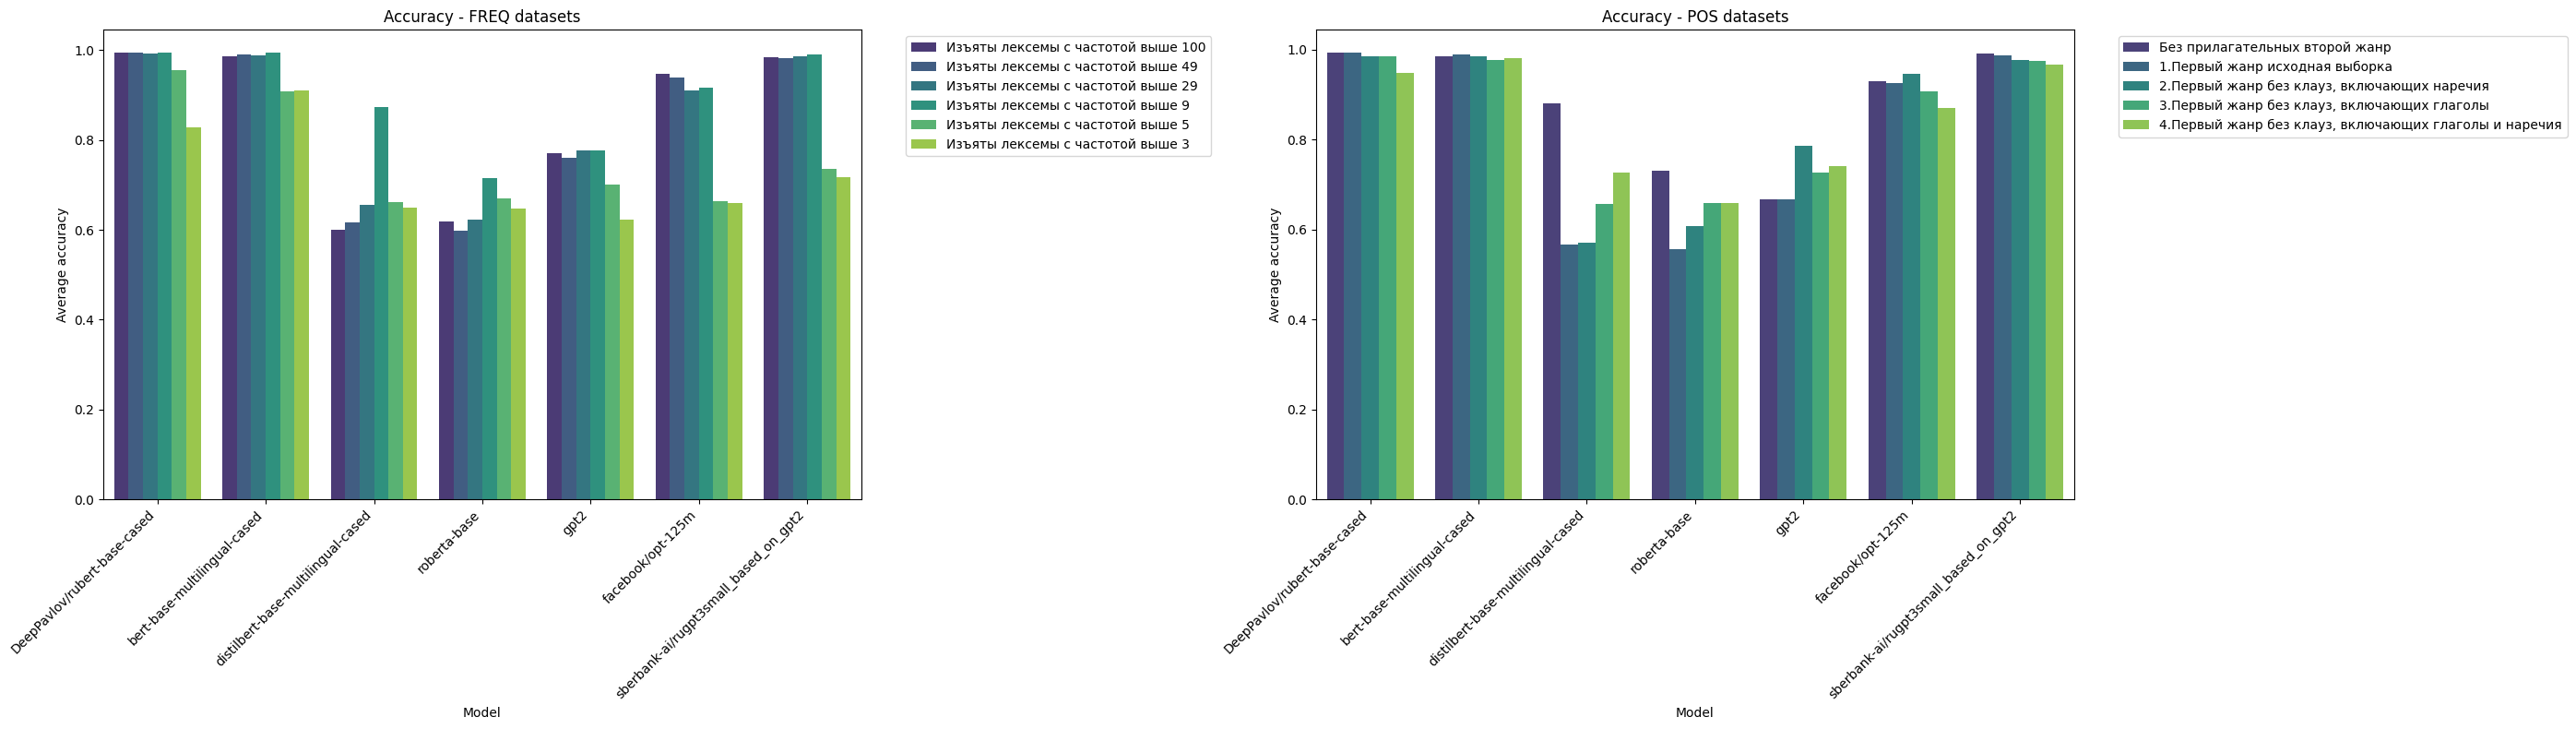

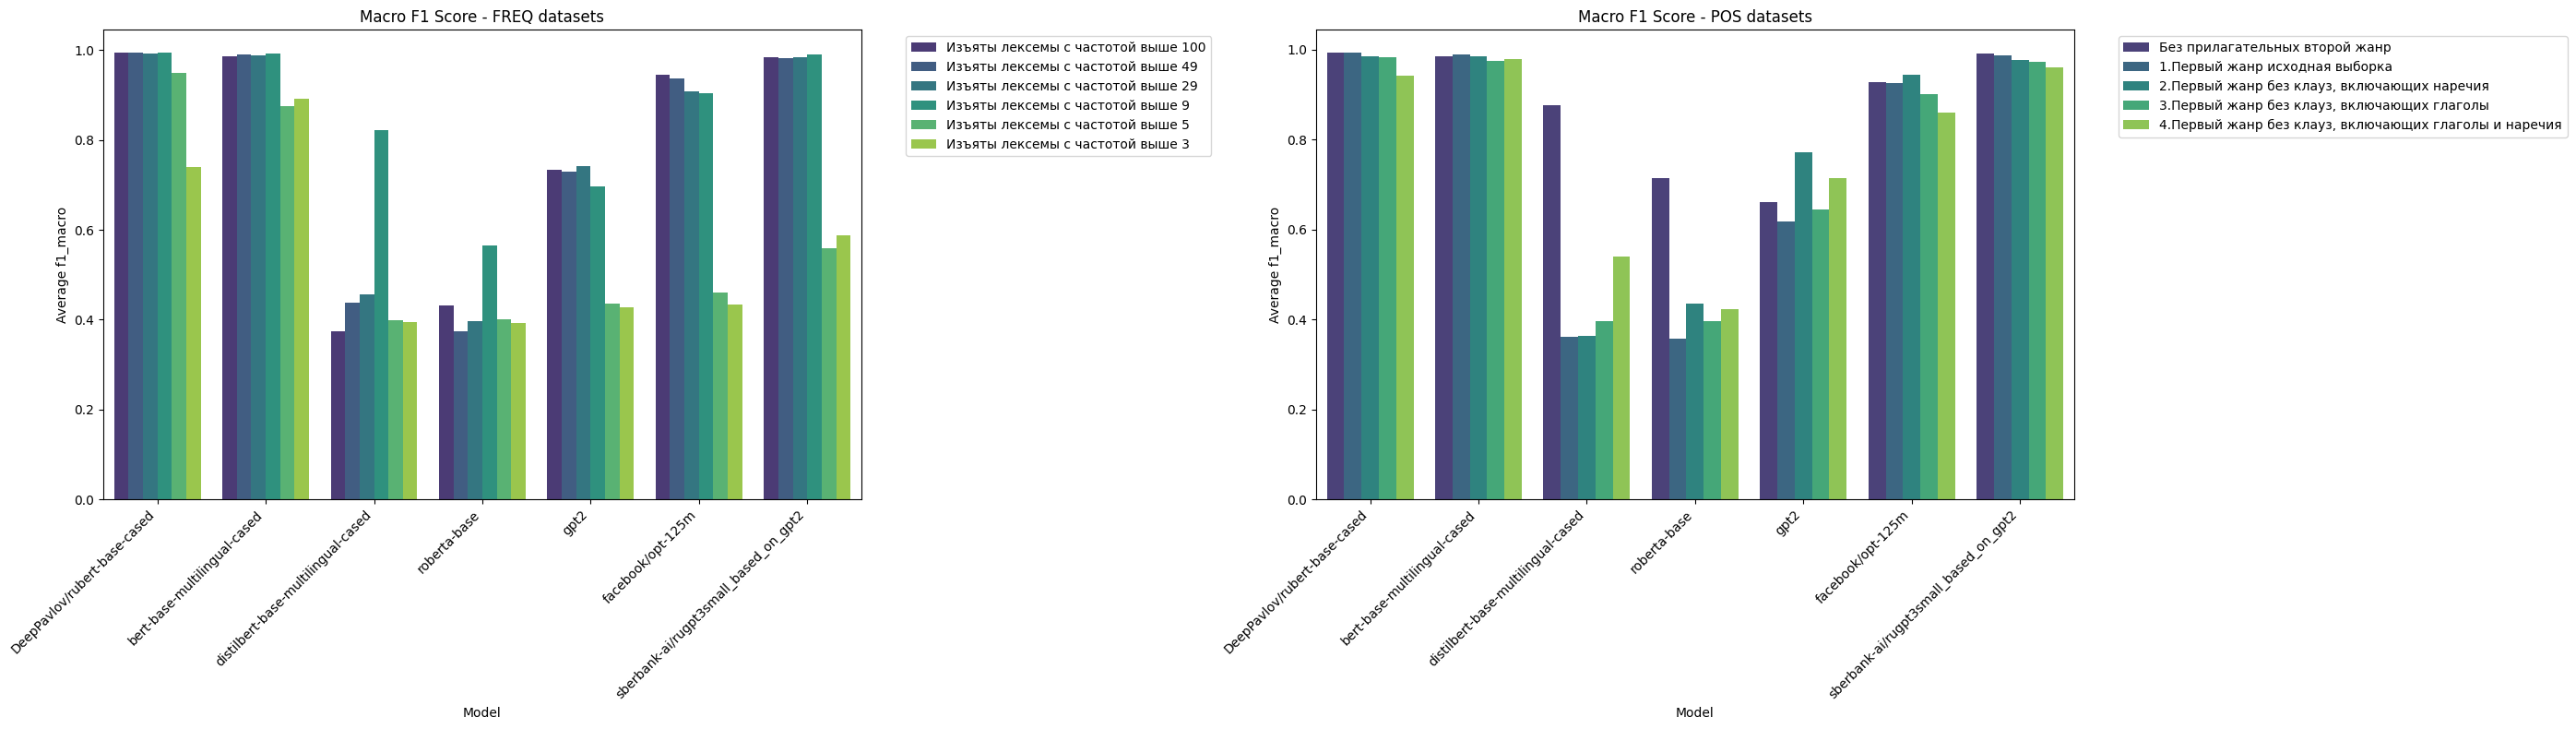

In [3]:
def plot_metric_by_dataset_type(metric, title):
    plt.figure(figsize=(28, 8))
    
    # Split by dataset type
    for dataset_type in ['freq', 'pos']:
        subset = df[df['dataset_type'] == dataset_type]
        
        if not subset.empty:
            plt.subplot(1, 2, 1 if dataset_type == 'freq' else 2)
            sns.barplot(data=subset, x='model_name', y=f'avg_{metric}', hue='dataset_name', 
                        palette='viridis', errorbar='sd')
            plt.title(f'{title} - {dataset_type.upper()} datasets')
            plt.xticks(rotation=45, ha='right')
            plt.ylabel(f'Average {metric}')
            plt.xlabel('Model')
            plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
            
    plt.tight_layout()
    plt.savefig(f'{metric}_by_dataset_type.png', bbox_inches='tight', dpi=300)
    plt.show()

# Plot accuracy and F1
plot_metric_by_dataset_type('accuracy', 'Accuracy')
plot_metric_by_dataset_type('f1_macro', 'Macro F1 Score')

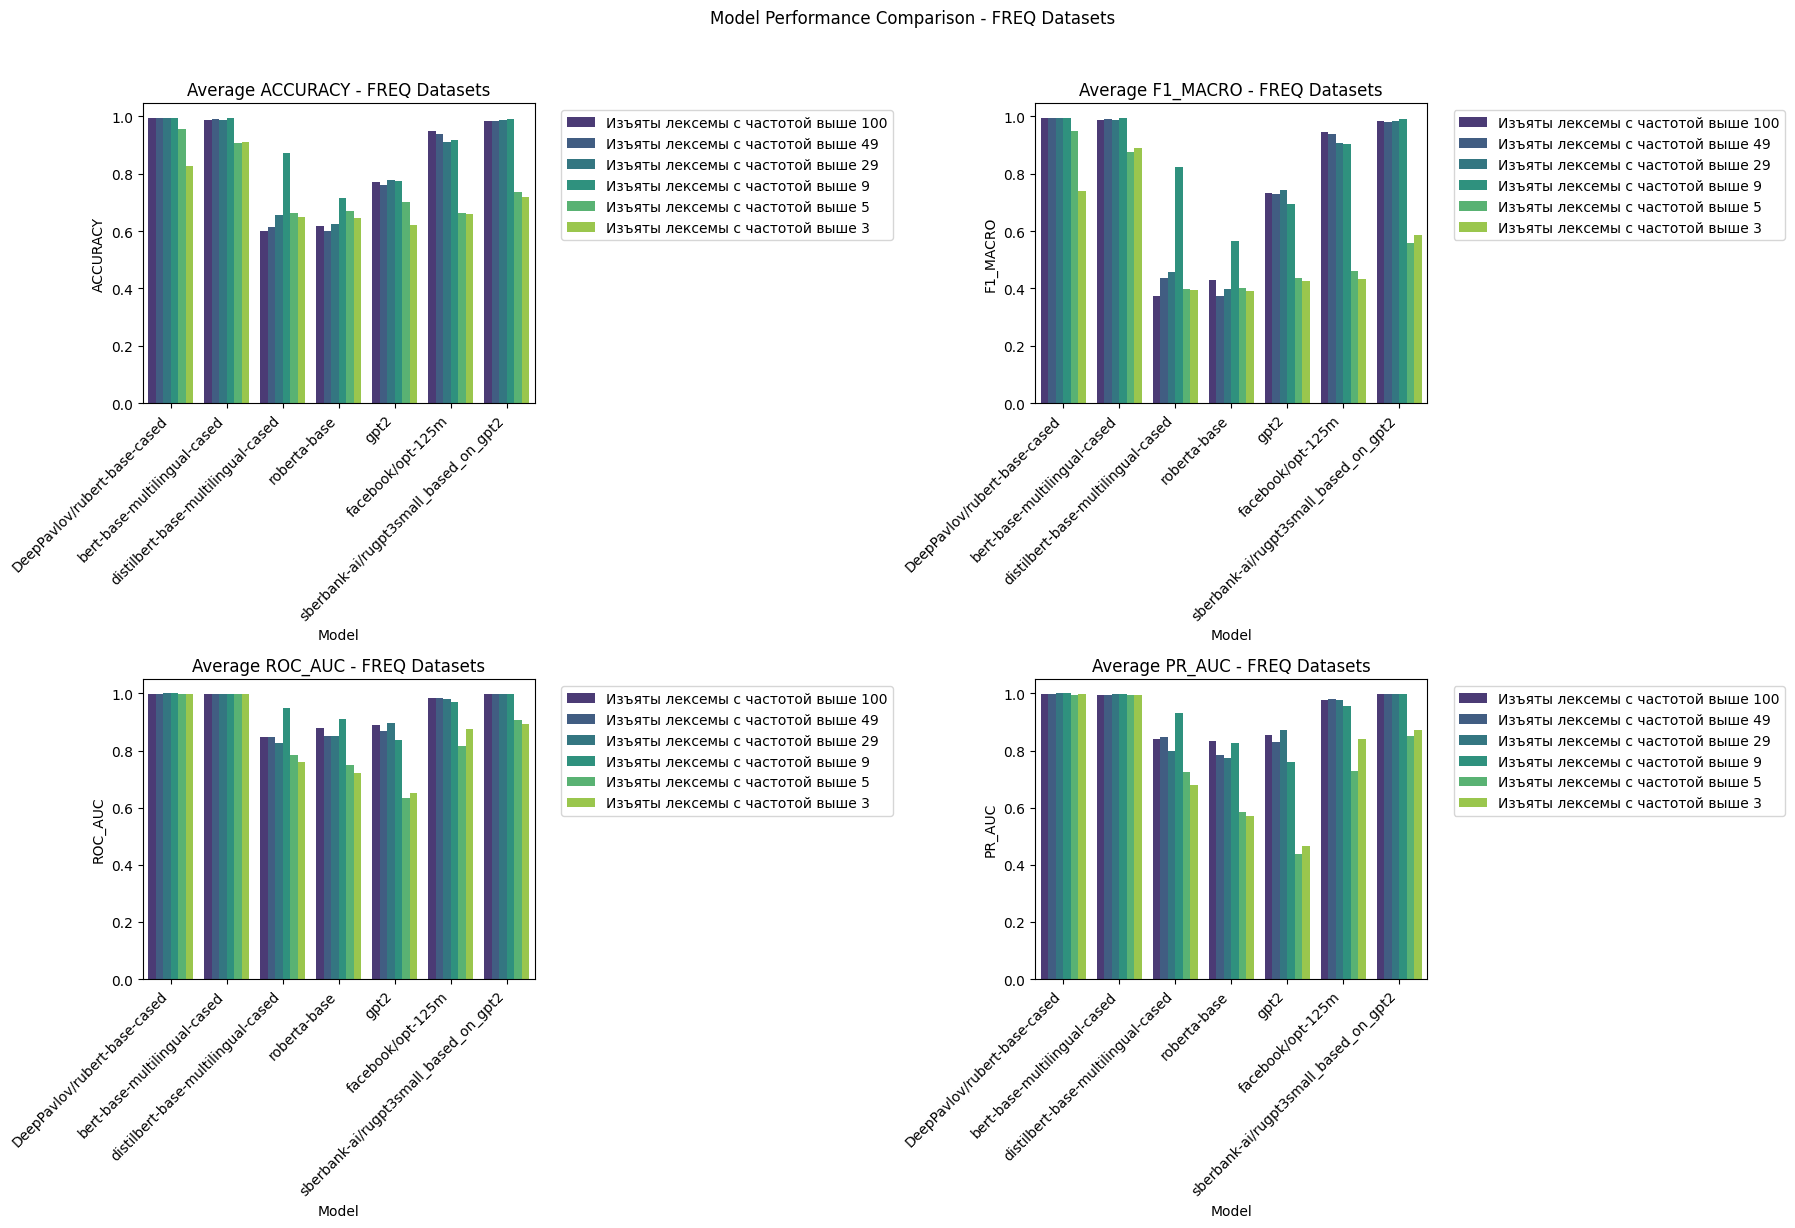

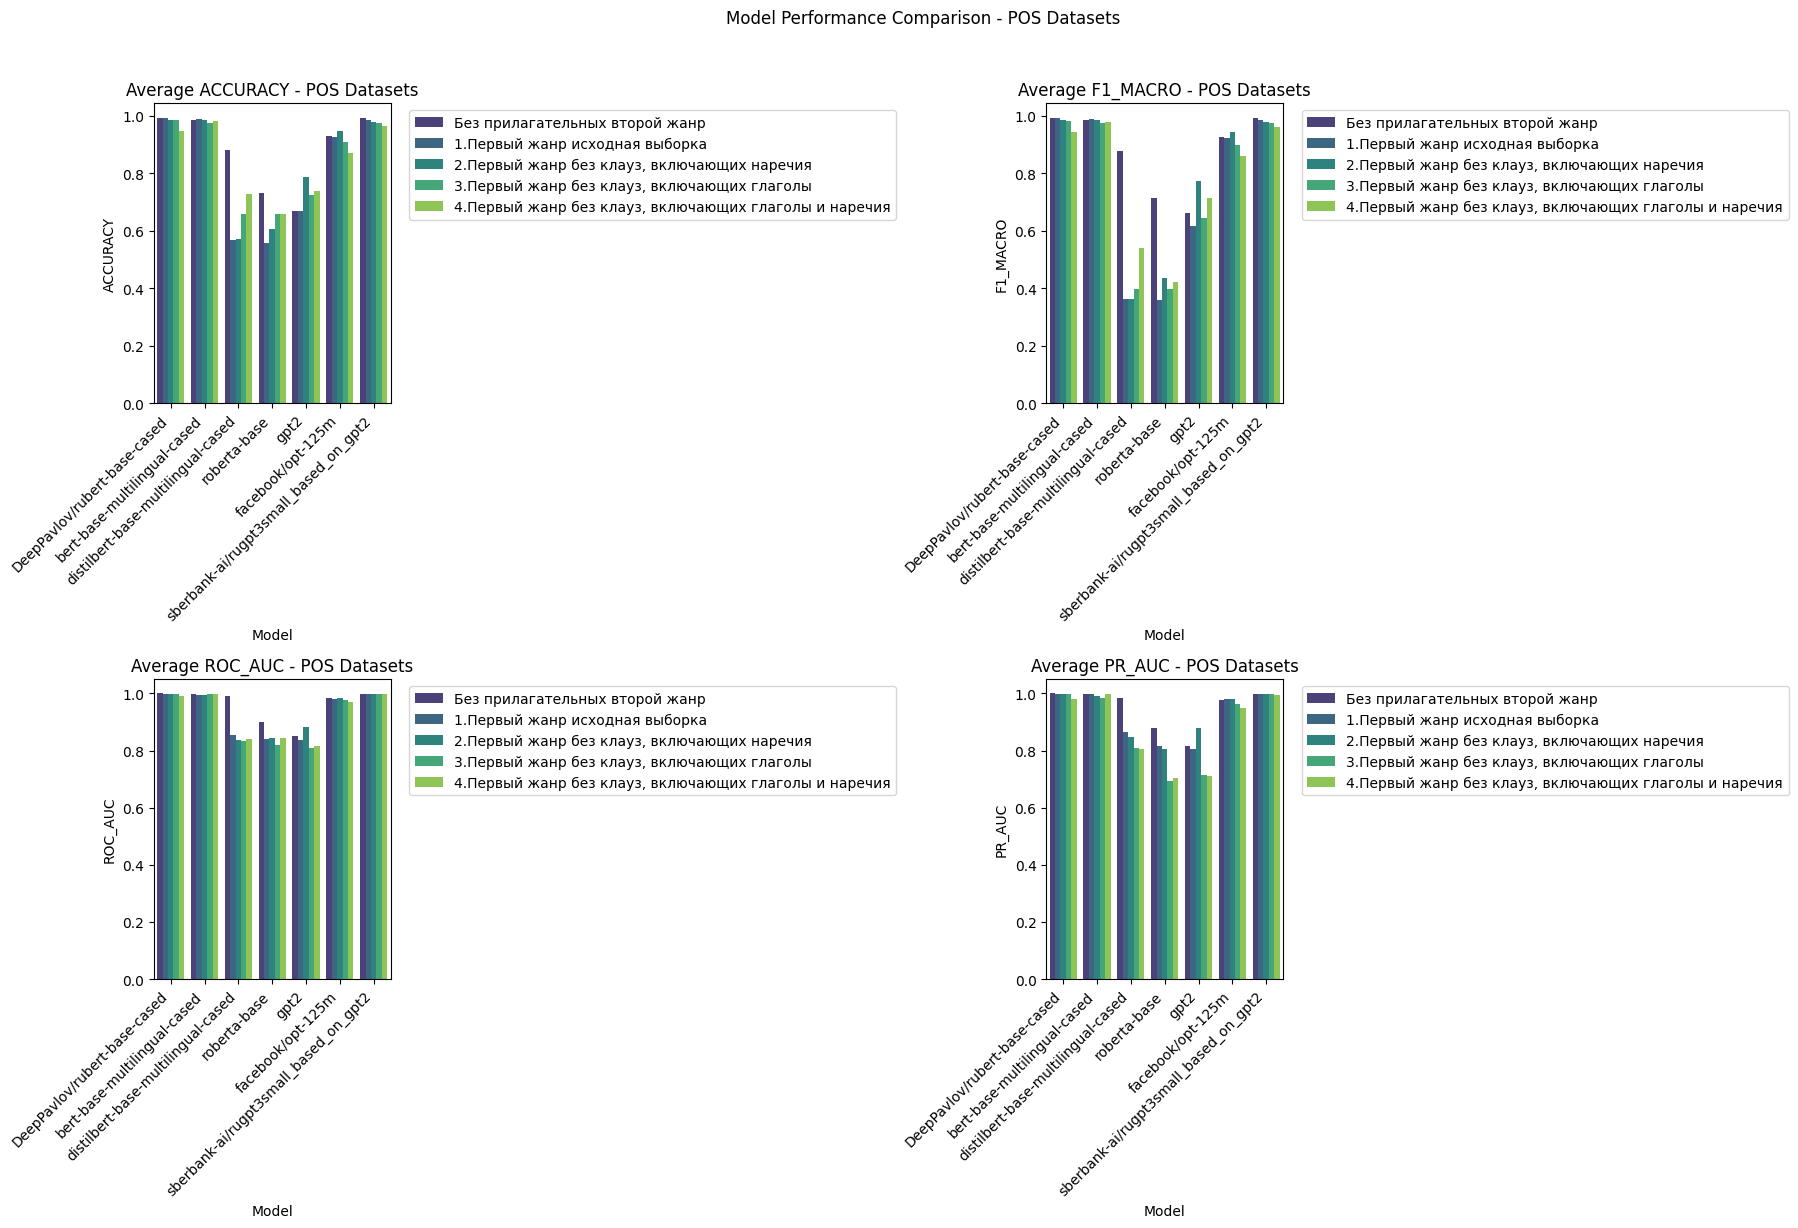

In [6]:
def plot_comprehensive_comparison():
    metrics = ['accuracy', 'f1_macro', 'roc_auc', 'pr_auc']
    n_metrics = len(metrics)
    
    for dataset_type in ['freq', 'pos']:
        subset = df[df['dataset_type'] == dataset_type]
        if subset.empty:
            continue
            
        plt.figure(figsize=(18, 12))
        
        for i, metric in enumerate(metrics, 1):
            plt.subplot(2, 2, i)
            sns.barplot(data=subset, x='model_name', y=f'avg_{metric}', 
                        hue='dataset_name', palette='viridis')
            plt.title(f'Average {metric.upper()} - {dataset_type.upper()} Datasets')
            plt.xticks(rotation=45, ha='right')
            plt.ylabel(metric.upper())
            plt.xlabel('Model')
            plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
            
        plt.suptitle(f'Model Performance Comparison - {dataset_type.upper()} Datasets', y=1.02)
        plt.tight_layout()
        plt.savefig(f'comprehensive_comparison_{dataset_type}.png', bbox_inches='tight', dpi=300)
        plt.show()

plot_comprehensive_comparison()

In [5]:
def create_performance_tables():
    # Create a table for each dataset type
    for dataset_type in ['freq', 'pos']:
        subset = df[df['dataset_type'] == dataset_type]
        if subset.empty:
            continue
            
        # Select relevant columns
        table_cols = ['model_name', 'dataset_name', 'avg_accuracy', 'std_accuracy', 
                     'avg_f1_macro', 'std_f1_macro', 'avg_roc_auc', 'std_roc_auc']
        
        # Create and display table
        table = subset[table_cols].sort_values(by=['dataset_name', 'avg_accuracy'], ascending=False)
        print(f"\nPerformance Table - {dataset_type.upper()} Datasets:")
        display(table)
        
        # Save to CSV
        table.to_csv(f'performance_table_{dataset_type}.csv', index=False)

create_performance_tables()


Performance Table - FREQ Datasets:


model_name                        dataset_name  \
3            DeepPavlov/rubert-base-cased    Изъяты лексемы с частотой выше 9   
14           bert-base-multilingual-cased    Изъяты лексемы с частотой выше 9   
69  sberbank-ai/rugpt3small_based_on_gpt2    Изъяты лексемы с частотой выше 9   
58                      facebook/opt-125m    Изъяты лексемы с частотой выше 9   
25     distilbert-base-multilingual-cased    Изъяты лексемы с частотой выше 9   
47                                   gpt2    Изъяты лексемы с частотой выше 9   
36                           roberta-base    Изъяты лексемы с частотой выше 9   
4            DeepPavlov/rubert-base-cased    Изъяты лексемы с частотой выше 5   
15           bert-base-multilingual-cased    Изъяты лексемы с частотой выше 5   
70  sberbank-ai/rugpt3small_based_on_gpt2    Изъяты лексемы с частотой выше 5   
48                                   gpt2    Изъяты лексемы с частотой выше 5   
37                           roberta-base    Изъяты лексемы с частотой выше 5   
59                      facebook/opt-125m    Изъяты лексемы с частотой выше 5   
26     distilbert-base-multilingual-cased    Изъяты лексемы с частотой выше 5   
1            DeepPavlov/rubert-base-cased   Изъяты лексемы с частотой выше 49   
12           bert-base-multilingual-cased   Изъяты лексемы с частотой выше 49   
67  sberbank-ai/rugpt3small_based_on_gpt2   Изъяты лексемы с частотой выше 49   
56                      facebook/opt-125m   Изъяты лексемы с частотой выше 49   
45                                   gpt2   Изъяты лексемы с частотой выше 49   
23     distilbert-base-multilingual-cased   Изъяты лексемы с частотой выше 49   
34                           roberta-base   Изъяты лексемы с частотой выше 49   
16           bert-base-multilingual-cased    Изъяты лексемы с частотой выше 3   
5            DeepPavlov/rubert-base-cased    Изъяты лексемы с частотой выше 3   
71  sberbank-ai/rugpt3small_based_on_gpt2    Изъяты лексемы с частотой выше 3   
60                      facebook/opt-125m    Изъяты лексемы с частотой выше 3   
27     distilbert-base-multilingual-cased    Изъяты лексемы с частотой выше 3   
38                           roberta-base    Изъяты лексемы с частотой выше 3   
49                                   gpt2    Изъяты лексемы с частотой выше 3   
2            DeepPavlov/rubert-base-cased   Изъяты лексемы с частотой выше 29   
13           bert-base-multilingual-cased   Изъяты лексемы с частотой выше 29   
68  sberbank-ai/rugpt3small_based_on_gpt2   Изъяты лексемы с частотой выше 29   
57                      facebook/opt-125m   Изъяты лексемы с частотой выше 29   
46                                   gpt2   Изъяты лексемы с частотой выше 29   
24     distilbert-base-multilingual-cased   Изъяты лексемы с частотой выше 29   
35                           roberta-base   Изъяты лексемы с частотой выше 29   
0            DeepPavlov/rubert-base-cased  Изъяты лексемы с частотой выше 100   
11           bert-base-multilingual-cased  Изъяты лексемы с частотой выше 100   
66  sberbank-ai/rugpt3small_based_on_gpt2  Изъяты лексемы с частотой выше 100   
55                      facebook/opt-125m  Изъяты лексемы с частотой выше 100   
44                                   gpt2  Изъяты лексемы с частотой выше 100   
33                           roberta-base  Изъяты лексемы с частотой выше 100   
22     distilbert-base-multilingual-cased  Изъяты лексемы с частотой выше 100   

    avg_accuracy  std_accuracy  avg_f1_macro  std_f1_macro  avg_roc_auc  \
3       0.995149      0.006577      0.994153      0.007940     0.999937   
14      0.994340      0.003725      0.993161      0.004757     0.999658   
69      0.991193      0.004633      0.990248      0.005121     0.999570   
58      0.916389      0.011089      0.905017      0.010111     0.969589   
25      0.872893      0.035344      0.822078      0.063427     0.949705   
47      0.776167      0.018900      0.696058      0.052485     0.837598   
36      0.714581      


Performance Table - POS Datasets:


model_name  \
6            DeepPavlov/rubert-base-cased   
72  sberbank-ai/rugpt3small_based_on_gpt2   
17           bert-base-multilingual-cased   
61                      facebook/opt-125m   
28     distilbert-base-multilingual-cased   
39                           roberta-base   
50                                   gpt2   
21           bert-base-multilingual-cased   
76  sberbank-ai/rugpt3small_based_on_gpt2   
10           DeepPavlov/rubert-base-cased   
65                      facebook/opt-125m   
54                                   gpt2   
32     distilbert-base-multilingual-cased   
43                           roberta-base   
9            DeepPavlov/rubert-base-cased   
20           bert-base-multilingual-cased   
75  sberbank-ai/rugpt3small_based_on_gpt2   
64                      facebook/opt-125m   
53                                   gpt2   
42                           roberta-base   
31     distilbert-base-multilingual-cased   
19           bert-base-multilingual-cased   
8            DeepPavlov/rubert-base-cased   
74  sberbank-ai/rugpt3small_based_on_gpt2   
63                      facebook/opt-125m   
52                                   gpt2   
41                           roberta-base   
30     distilbert-base-multilingual-cased   
7            DeepPavlov/rubert-base-cased   
18           bert-base-multilingual-cased   
73  sberbank-ai/rugpt3small_based_on_gpt2   
62                      facebook/opt-125m   
51                                   gpt2   
29     distilbert-base-multilingual-cased   
40                           roberta-base   

                                         dataset_name  avg_accuracy  \
6                      Без прилагательных второй жанр      0.994195   
72                     Без прилагательных второй жанр      0.991701   
17                     Без прилагательных второй жанр      0.985849   
61                     Без прилагательных второй жанр      0.929019   
28                     Без прилагательных второй жанр      0.879787   
39                     Без прилагательных второй жанр      0.731120   
50                     Без прилагательных второй жанр      0.667377   
21  4.Первый жанр без клауз, включающих глаголы и ...      0.981834   
76  4.Первый жанр без клауз, включающих глаголы и ...      0.965938   
10  4.Первый жанр без клауз, включающих глаголы и ...      0.947985   
65  4.Первый жанр без клауз, включающих глаголы и ...      0.870601   
54  4.Первый жанр без клауз, включающих глаголы и ...      0.740007   
32  4.Первый жанр без клауз, включающих глаголы и ...      0.726884   
43  4.Первый жанр без клауз, включающих глаголы и ...      0.658562   
9         3.Первый жанр без клауз, включающих глаголы      0.985238   
20        3.Первый жанр без клауз, включающих глаголы      0.976288   
75        3.Первый жанр без клауз, включающих глаголы      0.975759   
64        3.Первый жанр без клауз, включающих глаголы      0.907925   
53        3.Первый жанр без клауз, включающих глаголы      0.725705   
42        3.Первый жанр без клауз, включающих глаголы      0.658732   
31        3.Первый жанр без клауз, включающих глаголы      0.657700   
19        2.Первый жанр без клауз, включающих наречия      0.985476   
8         2.Первый жанр без клауз, включающих наречия      0.985203   
74        2.Первый жанр без клауз, включающих наречия      0.977597   
63        2.Первый жанр без клауз, включающих наречия      0.946128   
52        2.Первый жанр без клауз, включающих наречия      0.785799   
41        2.Первый жанр без клауз, включающих наречия      0.607073   
30        2.Первый жанр без клауз, включающих наречия      0.570595   
7                      1.Первый жанр исходная выборка      0.993952   
18                     1.Первый жанр исходная выборка      0.989894   
73                     1.Первый жанр исходная выборка      0.986191   
62                     1.Первый жанр исходная выборка      0.925133   
51                     1.Первый жанр исходная выборка      0.667872

Asignación de colores por modelo:
  DeepPavlov/rubert-base-cased: #AEC6CF
  bert-base-multilingual-cased: #FFB6C1
  distilbert-base-multilingual-cased: #98FF98
  roberta-base: #FFDAB9
  gpt2: #E6E6FA
  facebook/opt-125m: #F0E68C
  sberbank-ai/rugpt3small_based_on_gpt2: #ADD8E6
Modelos encontrados: 7

Procesando modelo: DeepPavlov/rubert-base-cased
Procesando modelo: bert-base-multilingual-cased


Procesando modelo: distilbert-base-multilingual-cased
Procesando modelo: roberta-base

Guardado en: confusion_matrices_by_model_parallel/confusion_matrices_roberta-base.png
Guardado en: confusion_matrices_by_model_parallel/confusion_matrices_distilbert-base-multilingual-cased.png
Guardado en: confusion_matrices_by_model_parallel/confusion_matrices_bert-base-multilingual-cased.png
Guardado en: confusion_matrices_by_model_parallel/confusion_matrices_DeepPavlov_rubert-base-cased.png


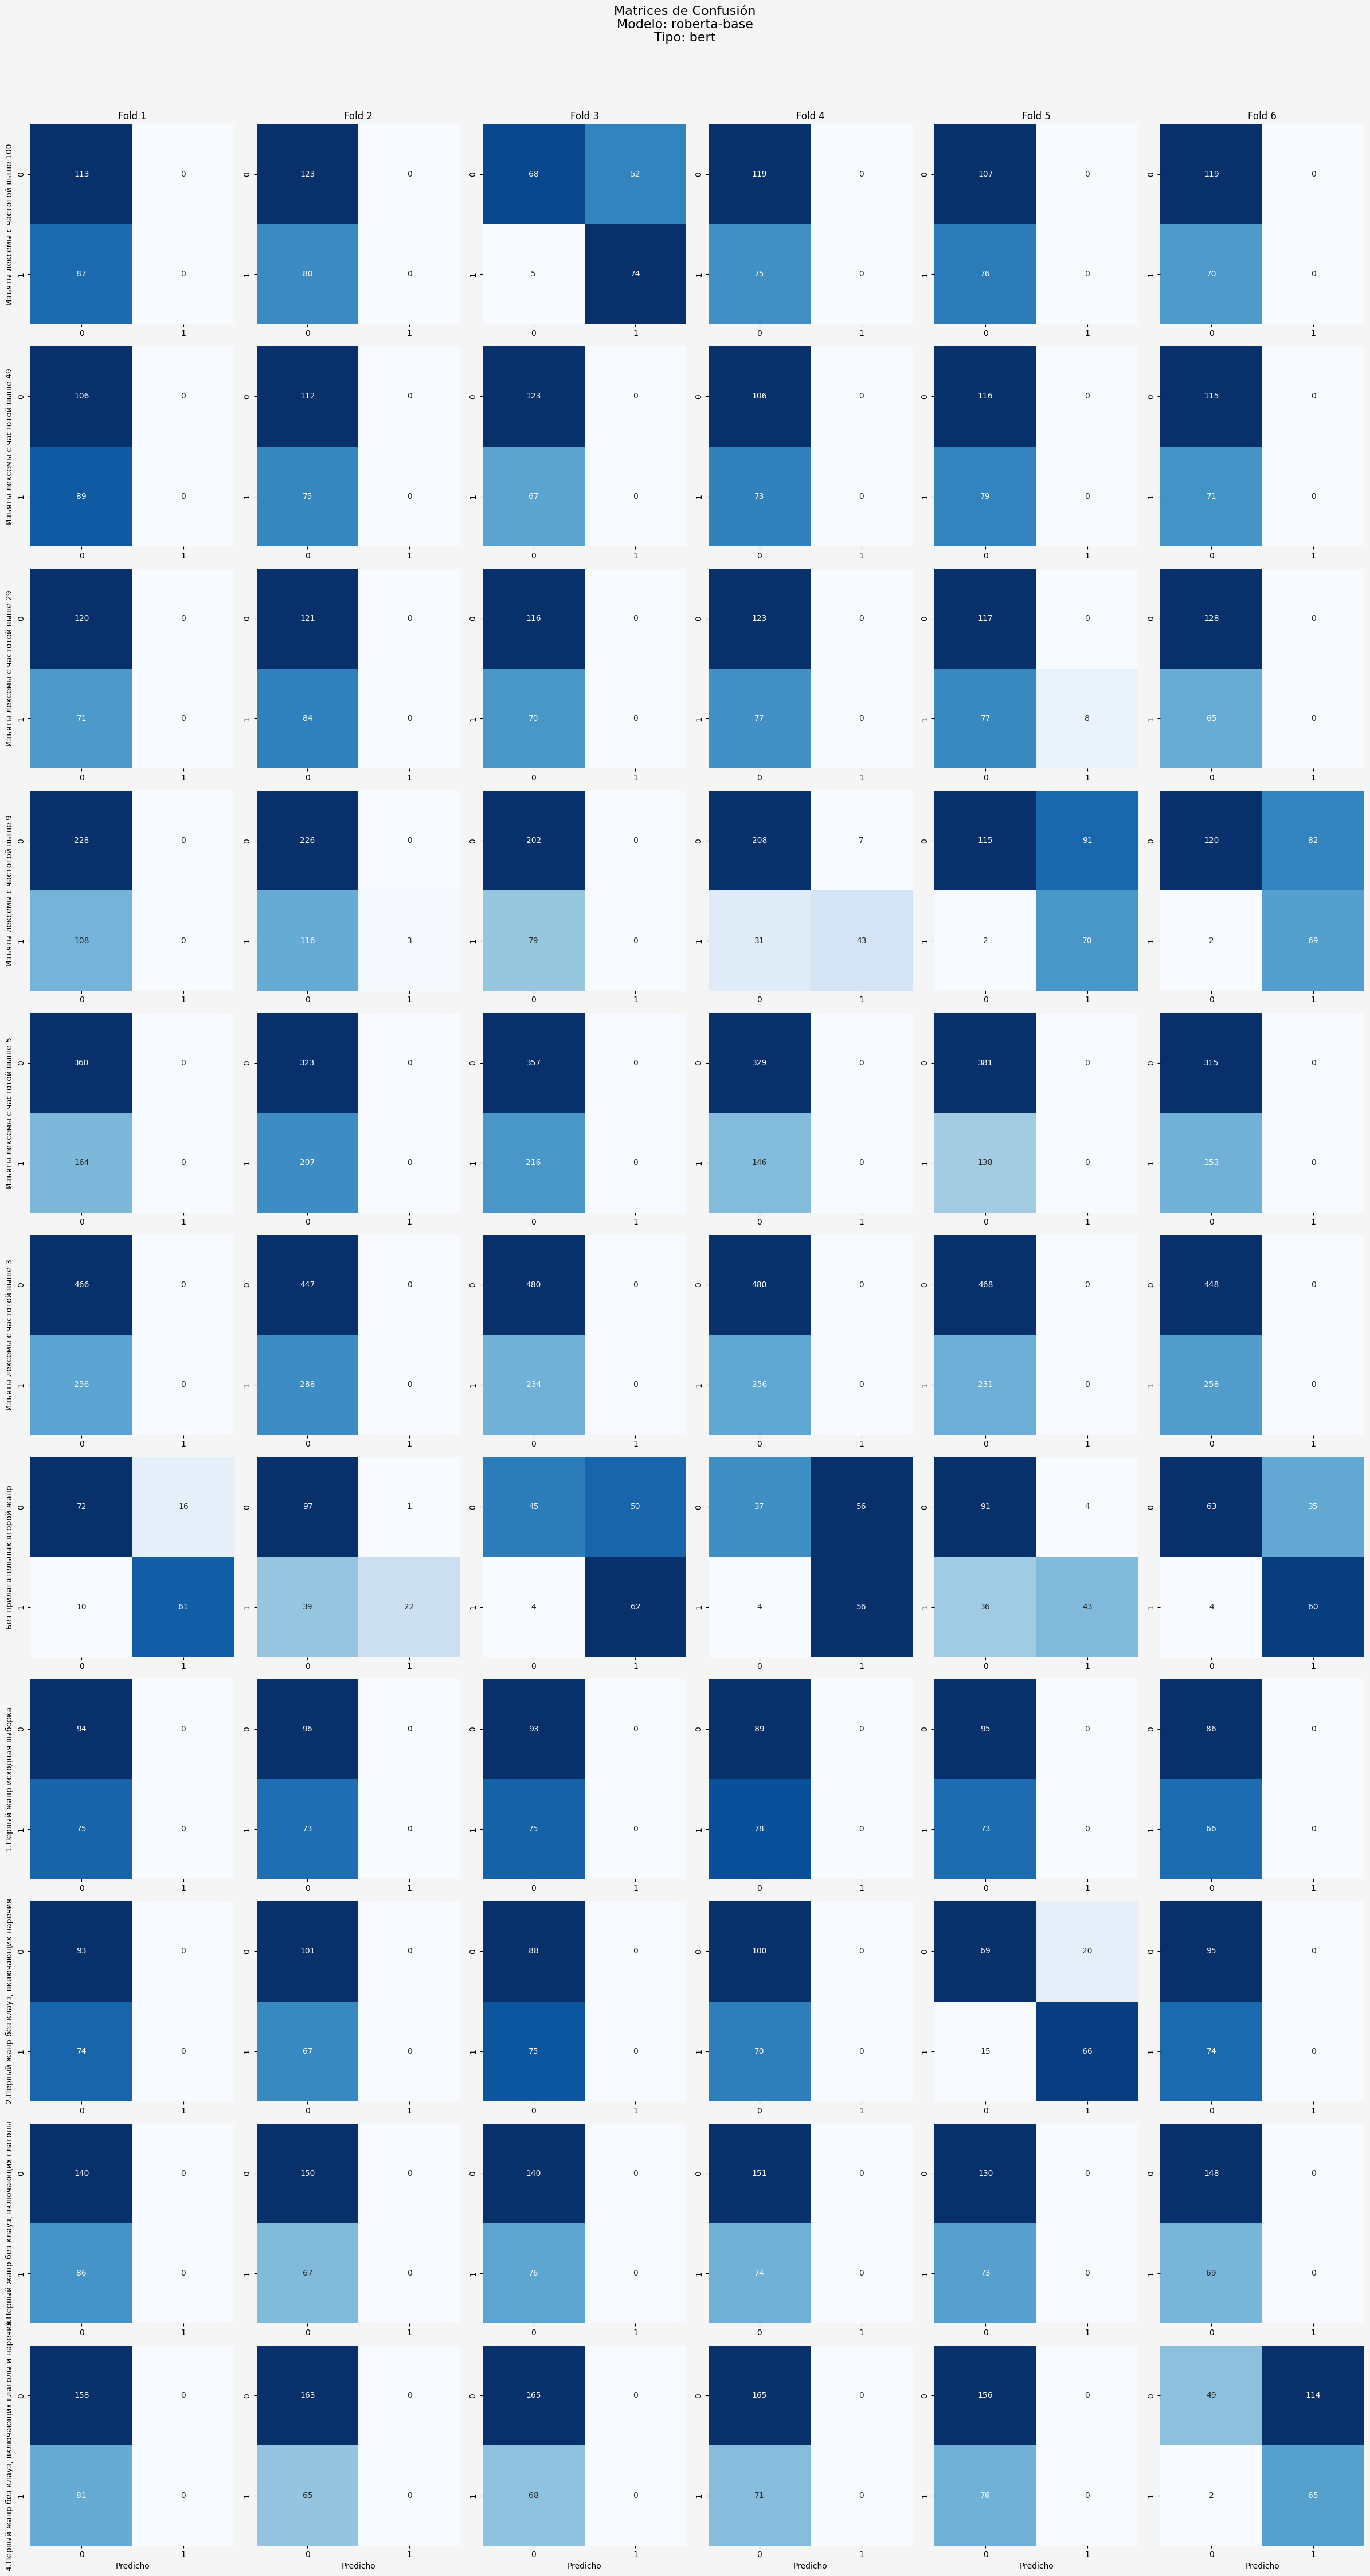


Procesando modelo: gpt2


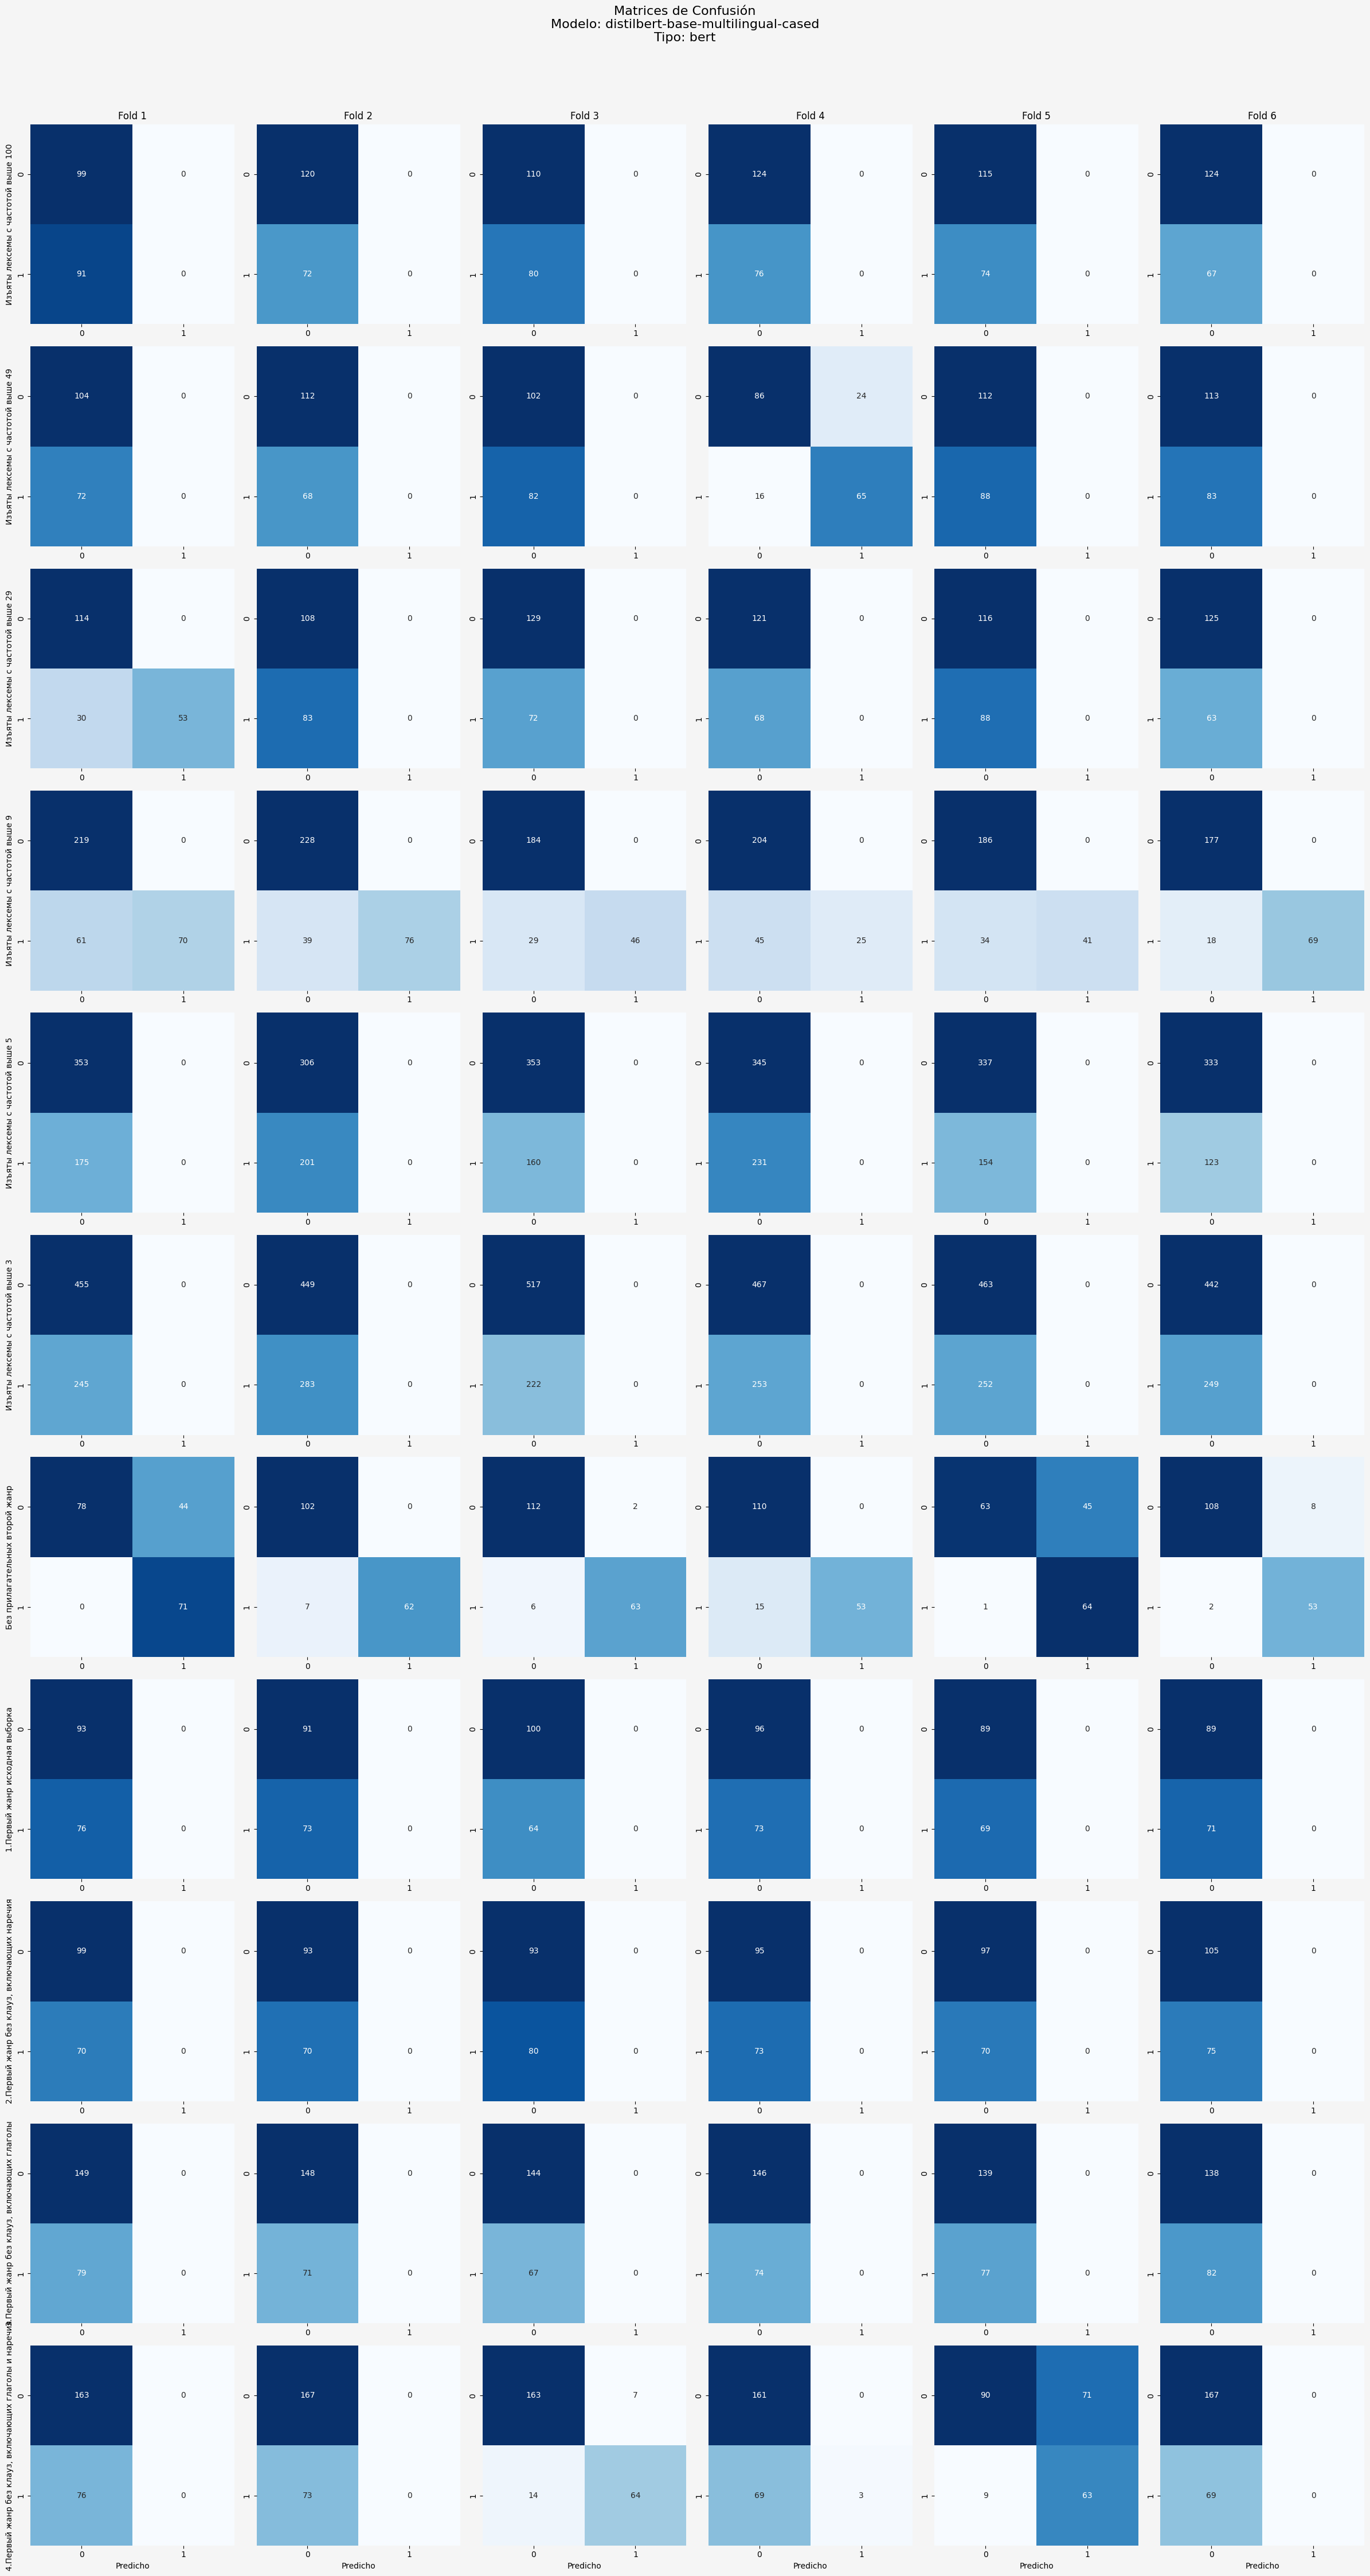


Procesando modelo: facebook/opt-125m


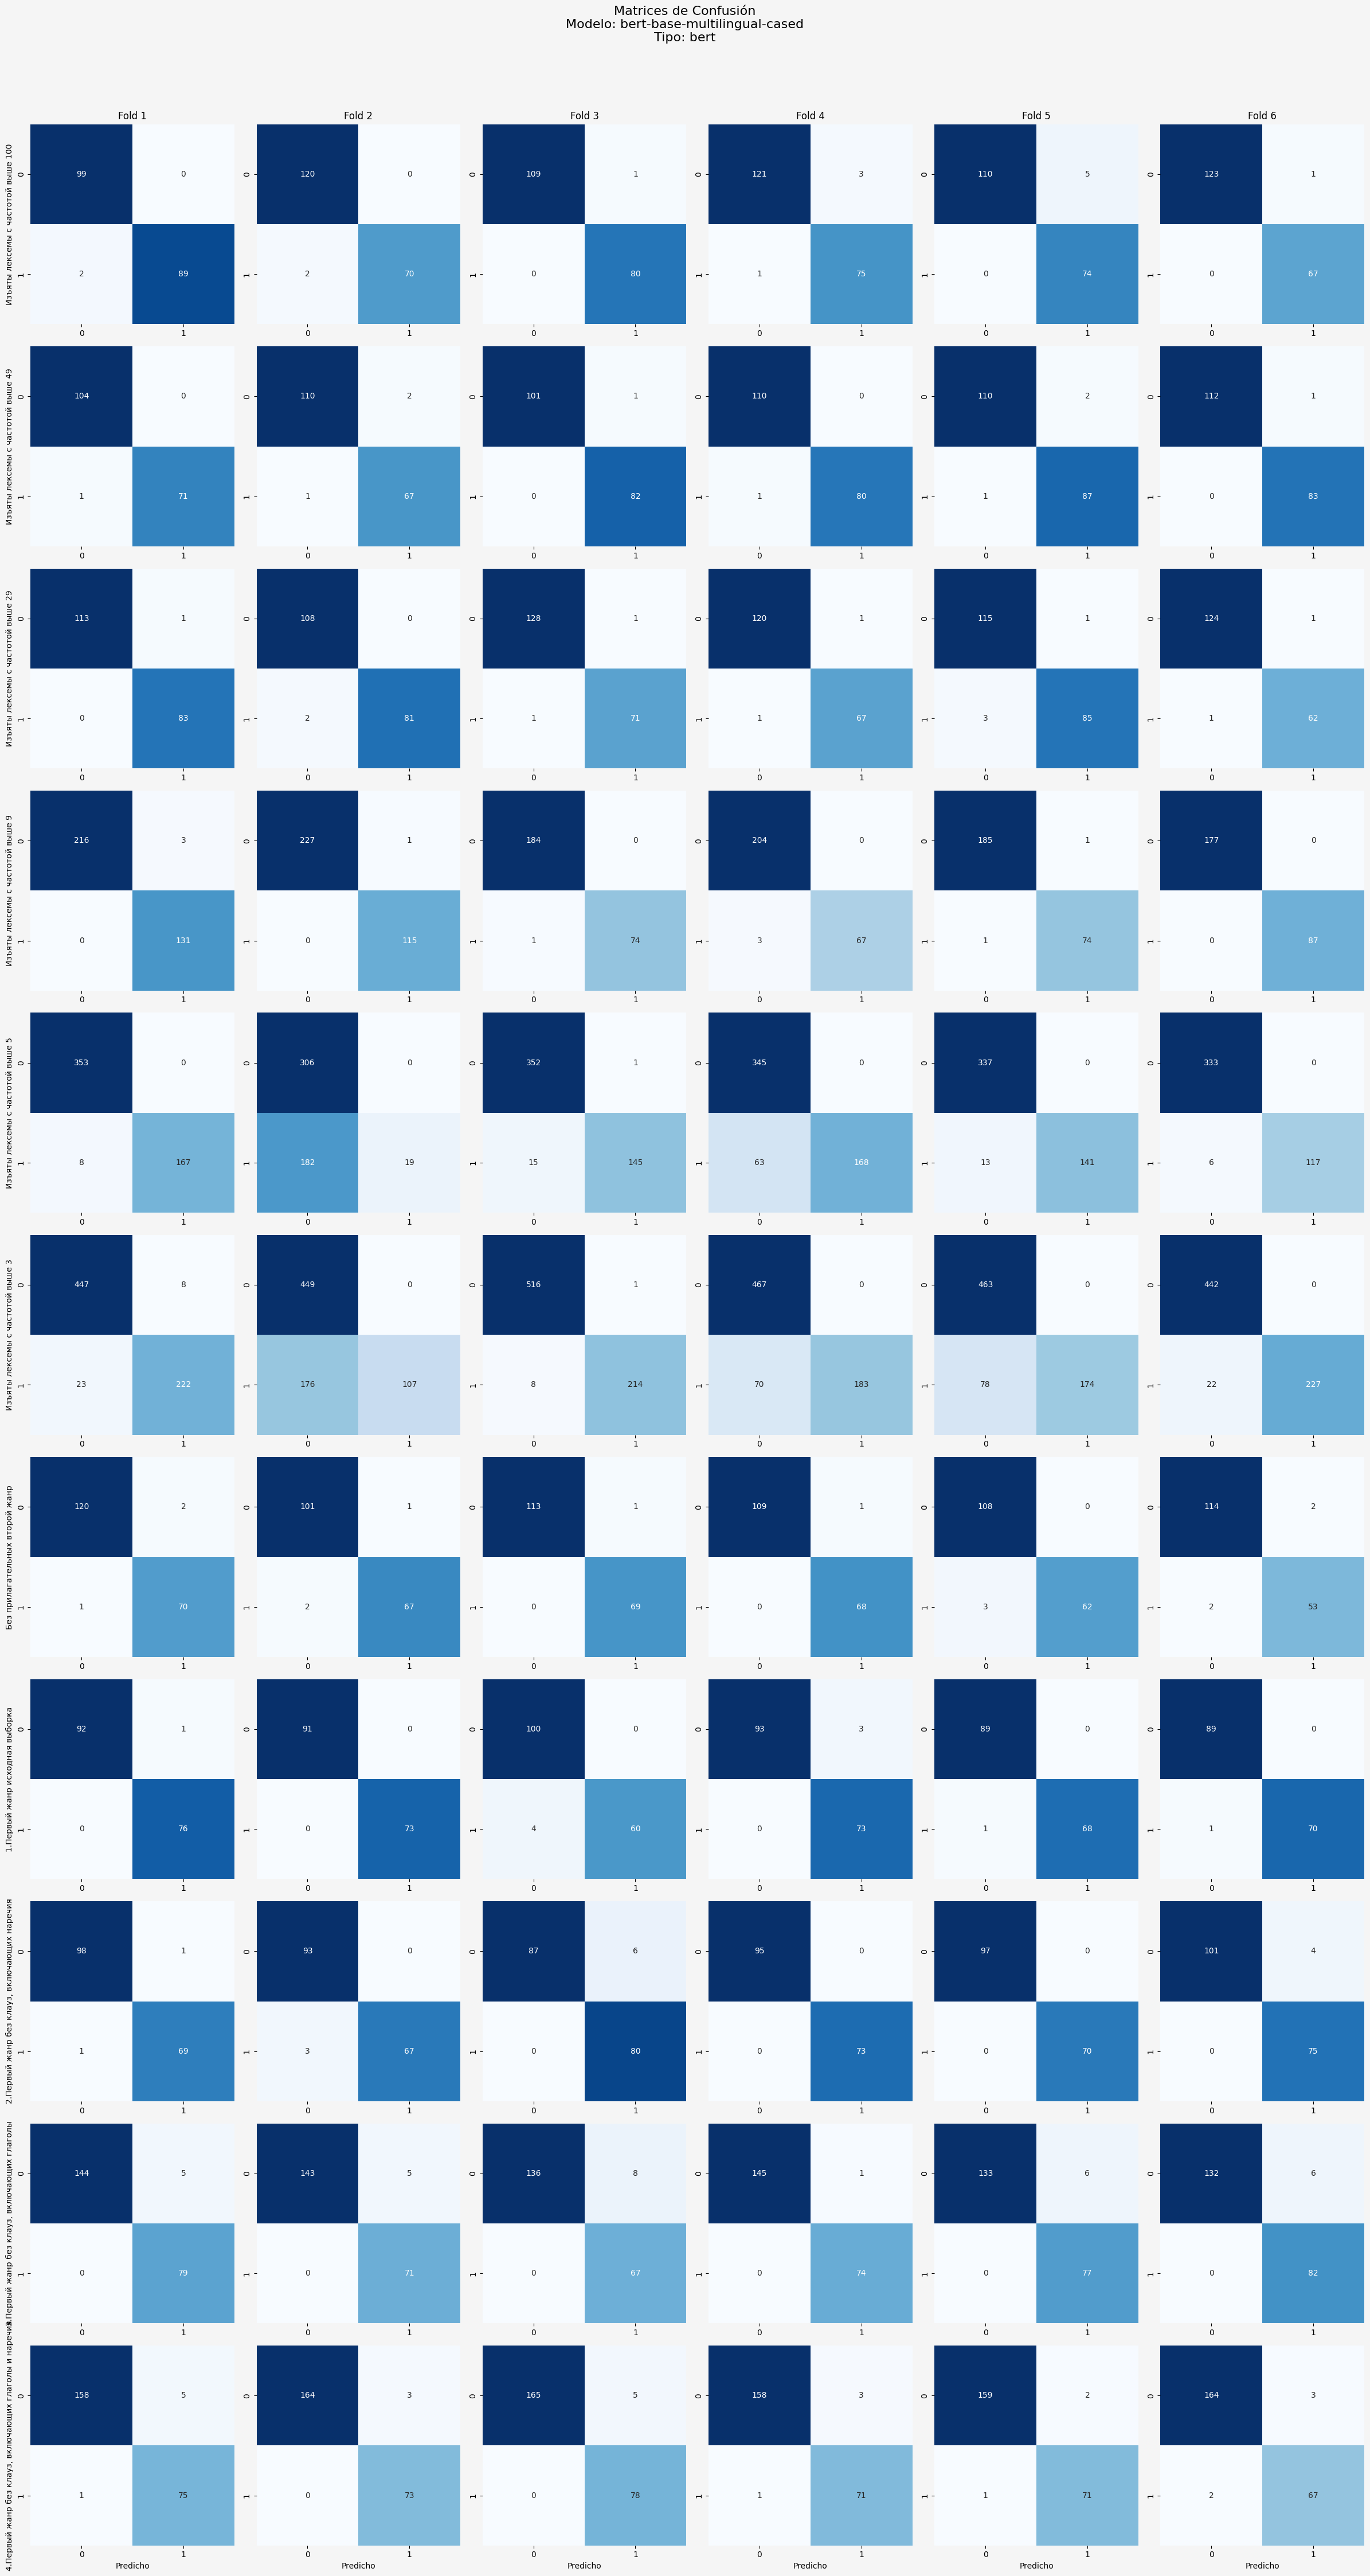


Procesando modelo: sberbank-ai/rugpt3small_based_on_gpt2


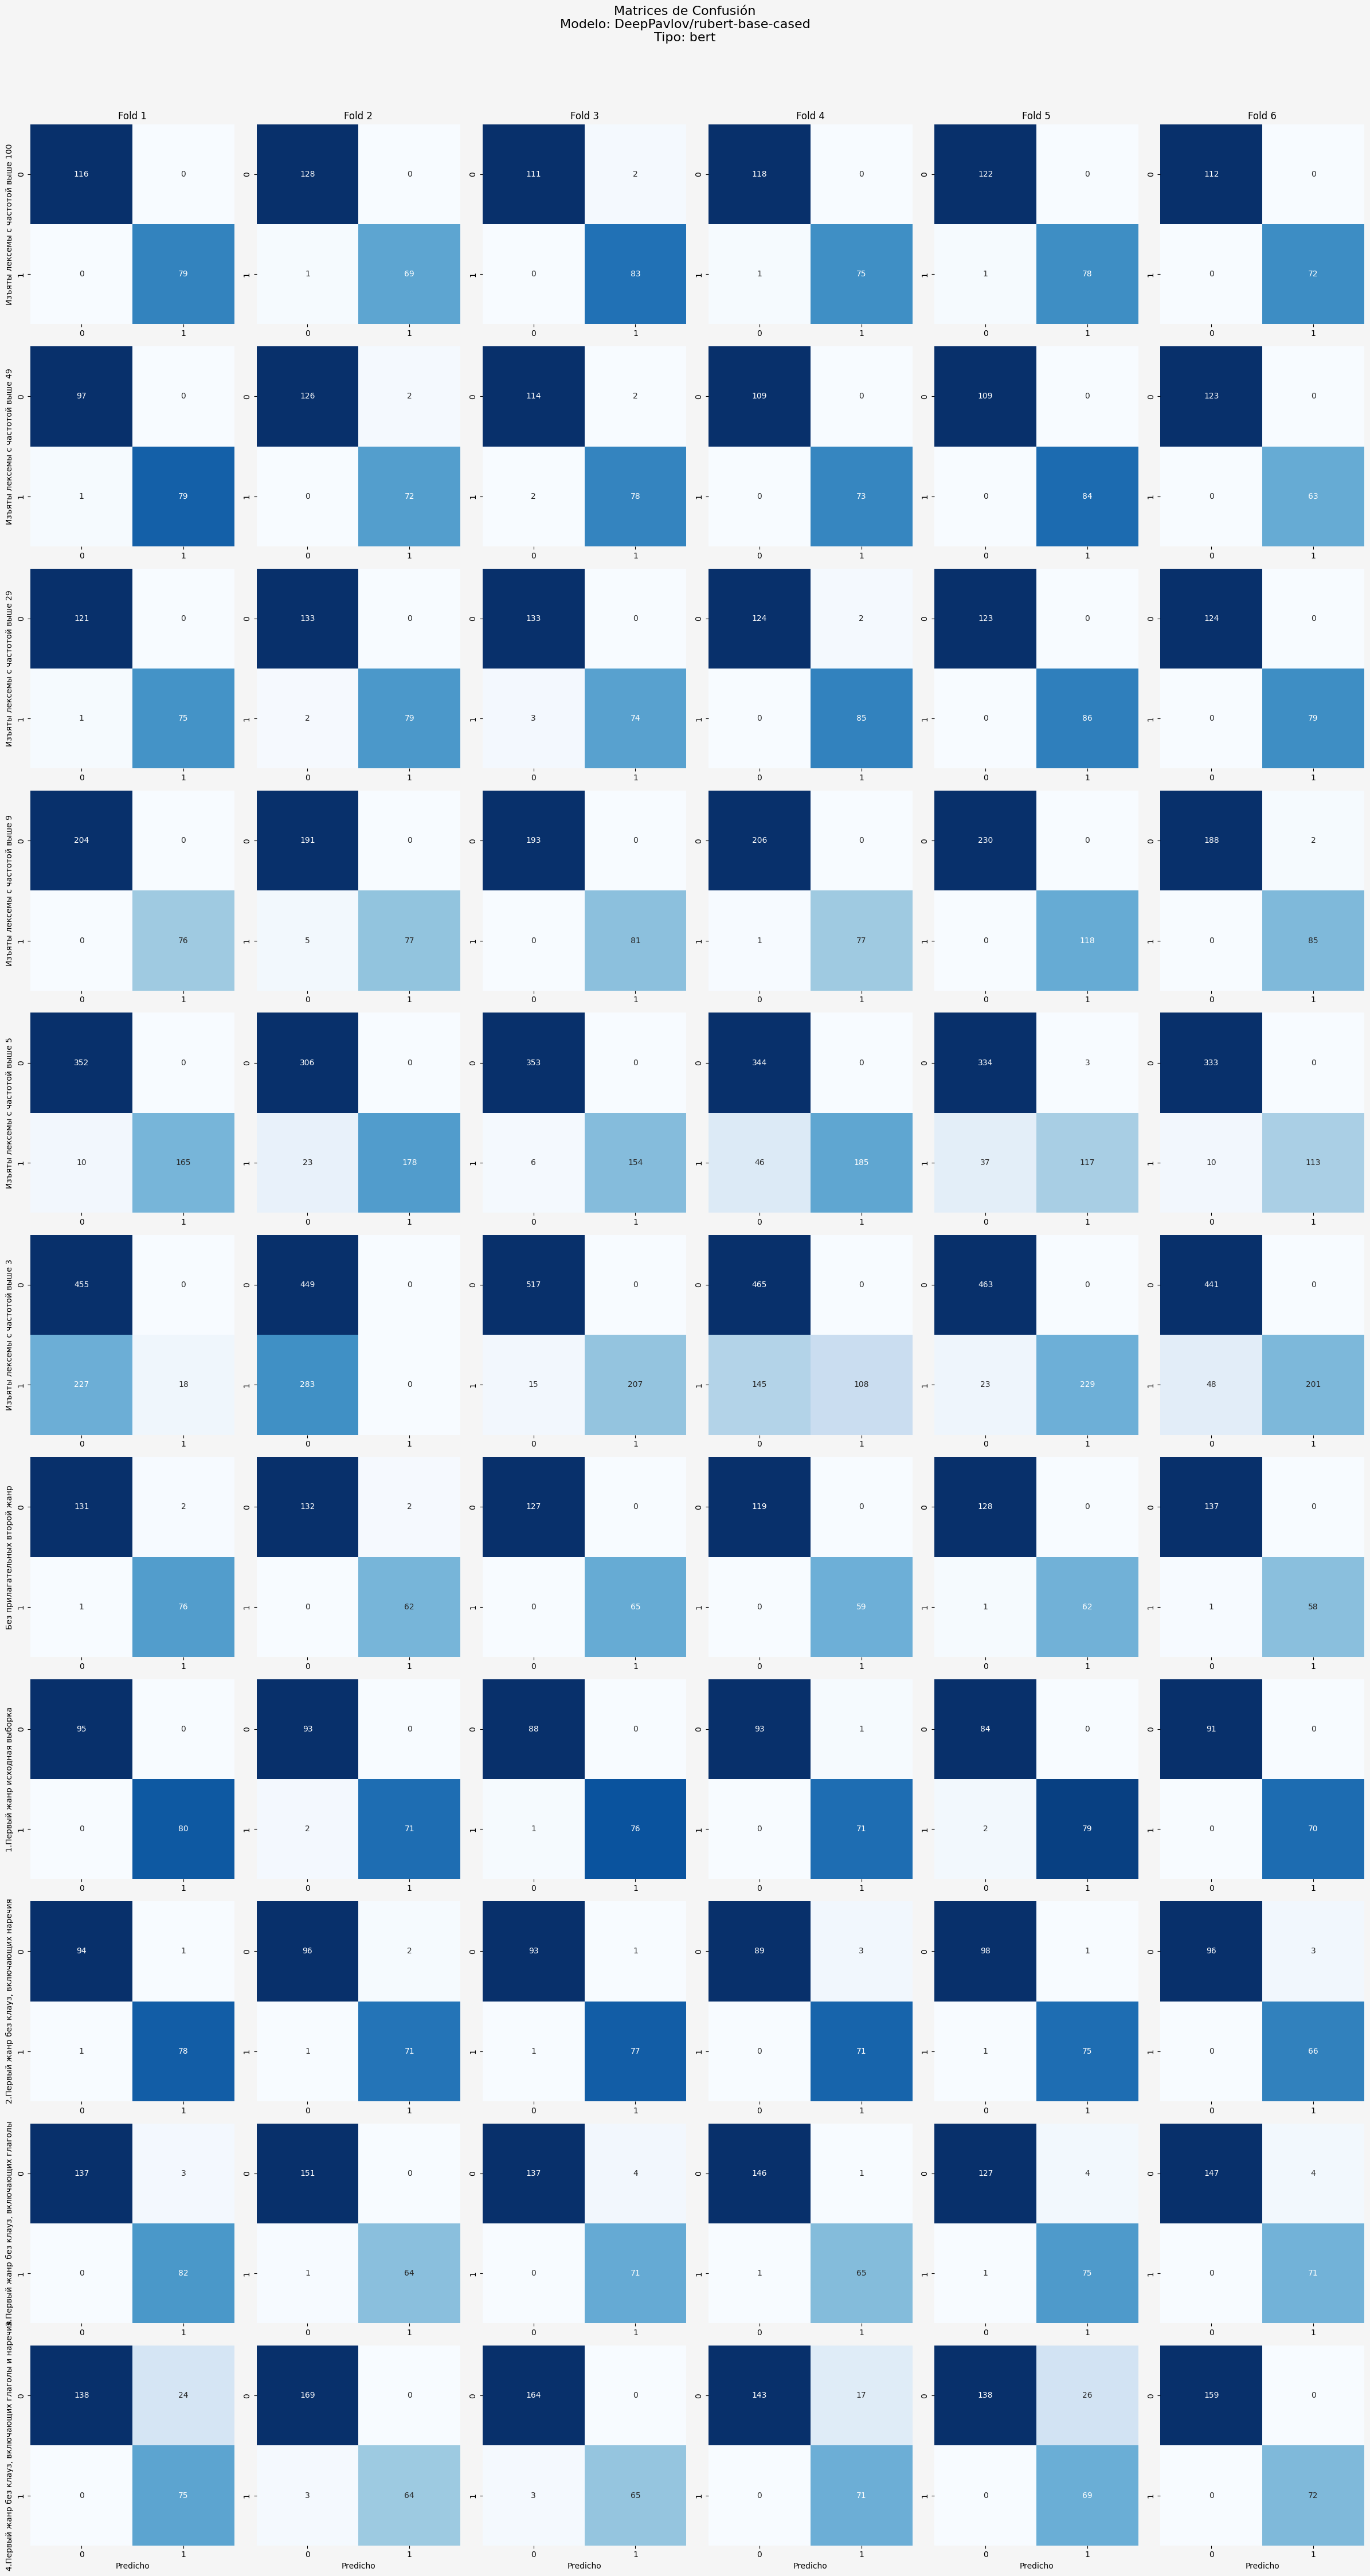

Guardado en: confusion_matrices_by_model_parallel/confusion_matrices_gpt2.png
Guardado en: confusion_matrices_by_model_parallel/confusion_matrices_sberbank-ai_rugpt3small_based_on_gpt2.png
Guardado en: confusion_matrices_by_model_parallel/confusion_matrices_facebook_opt-125m.png


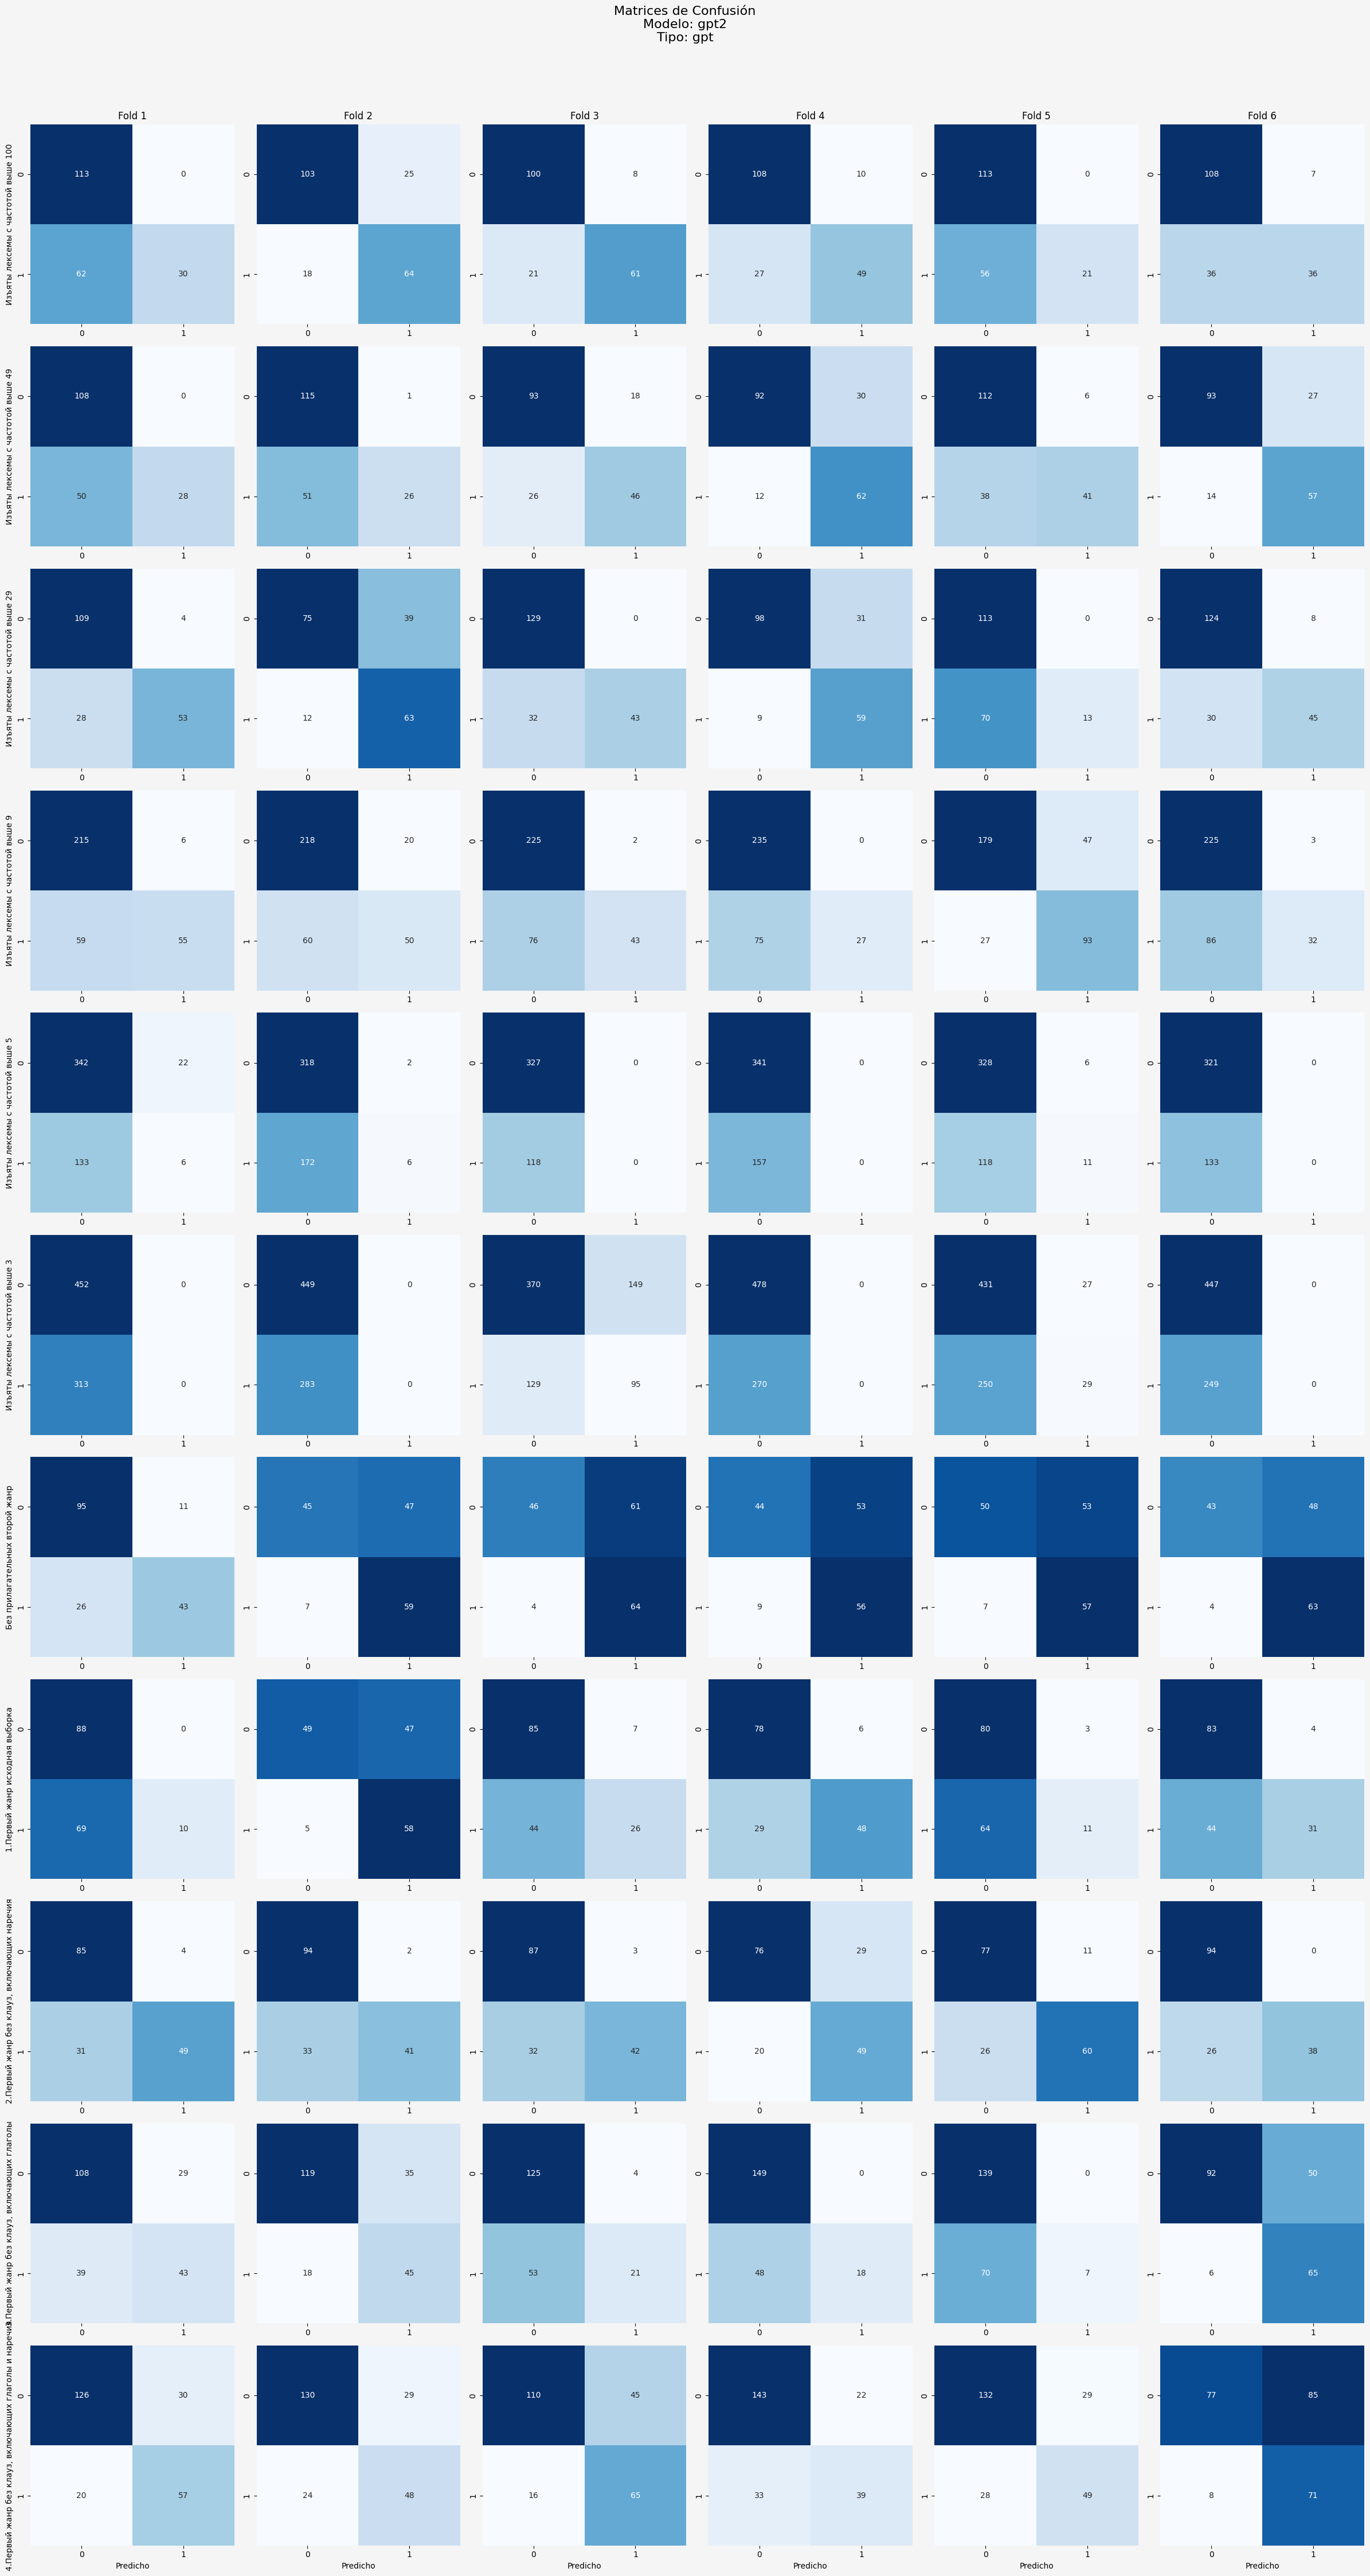

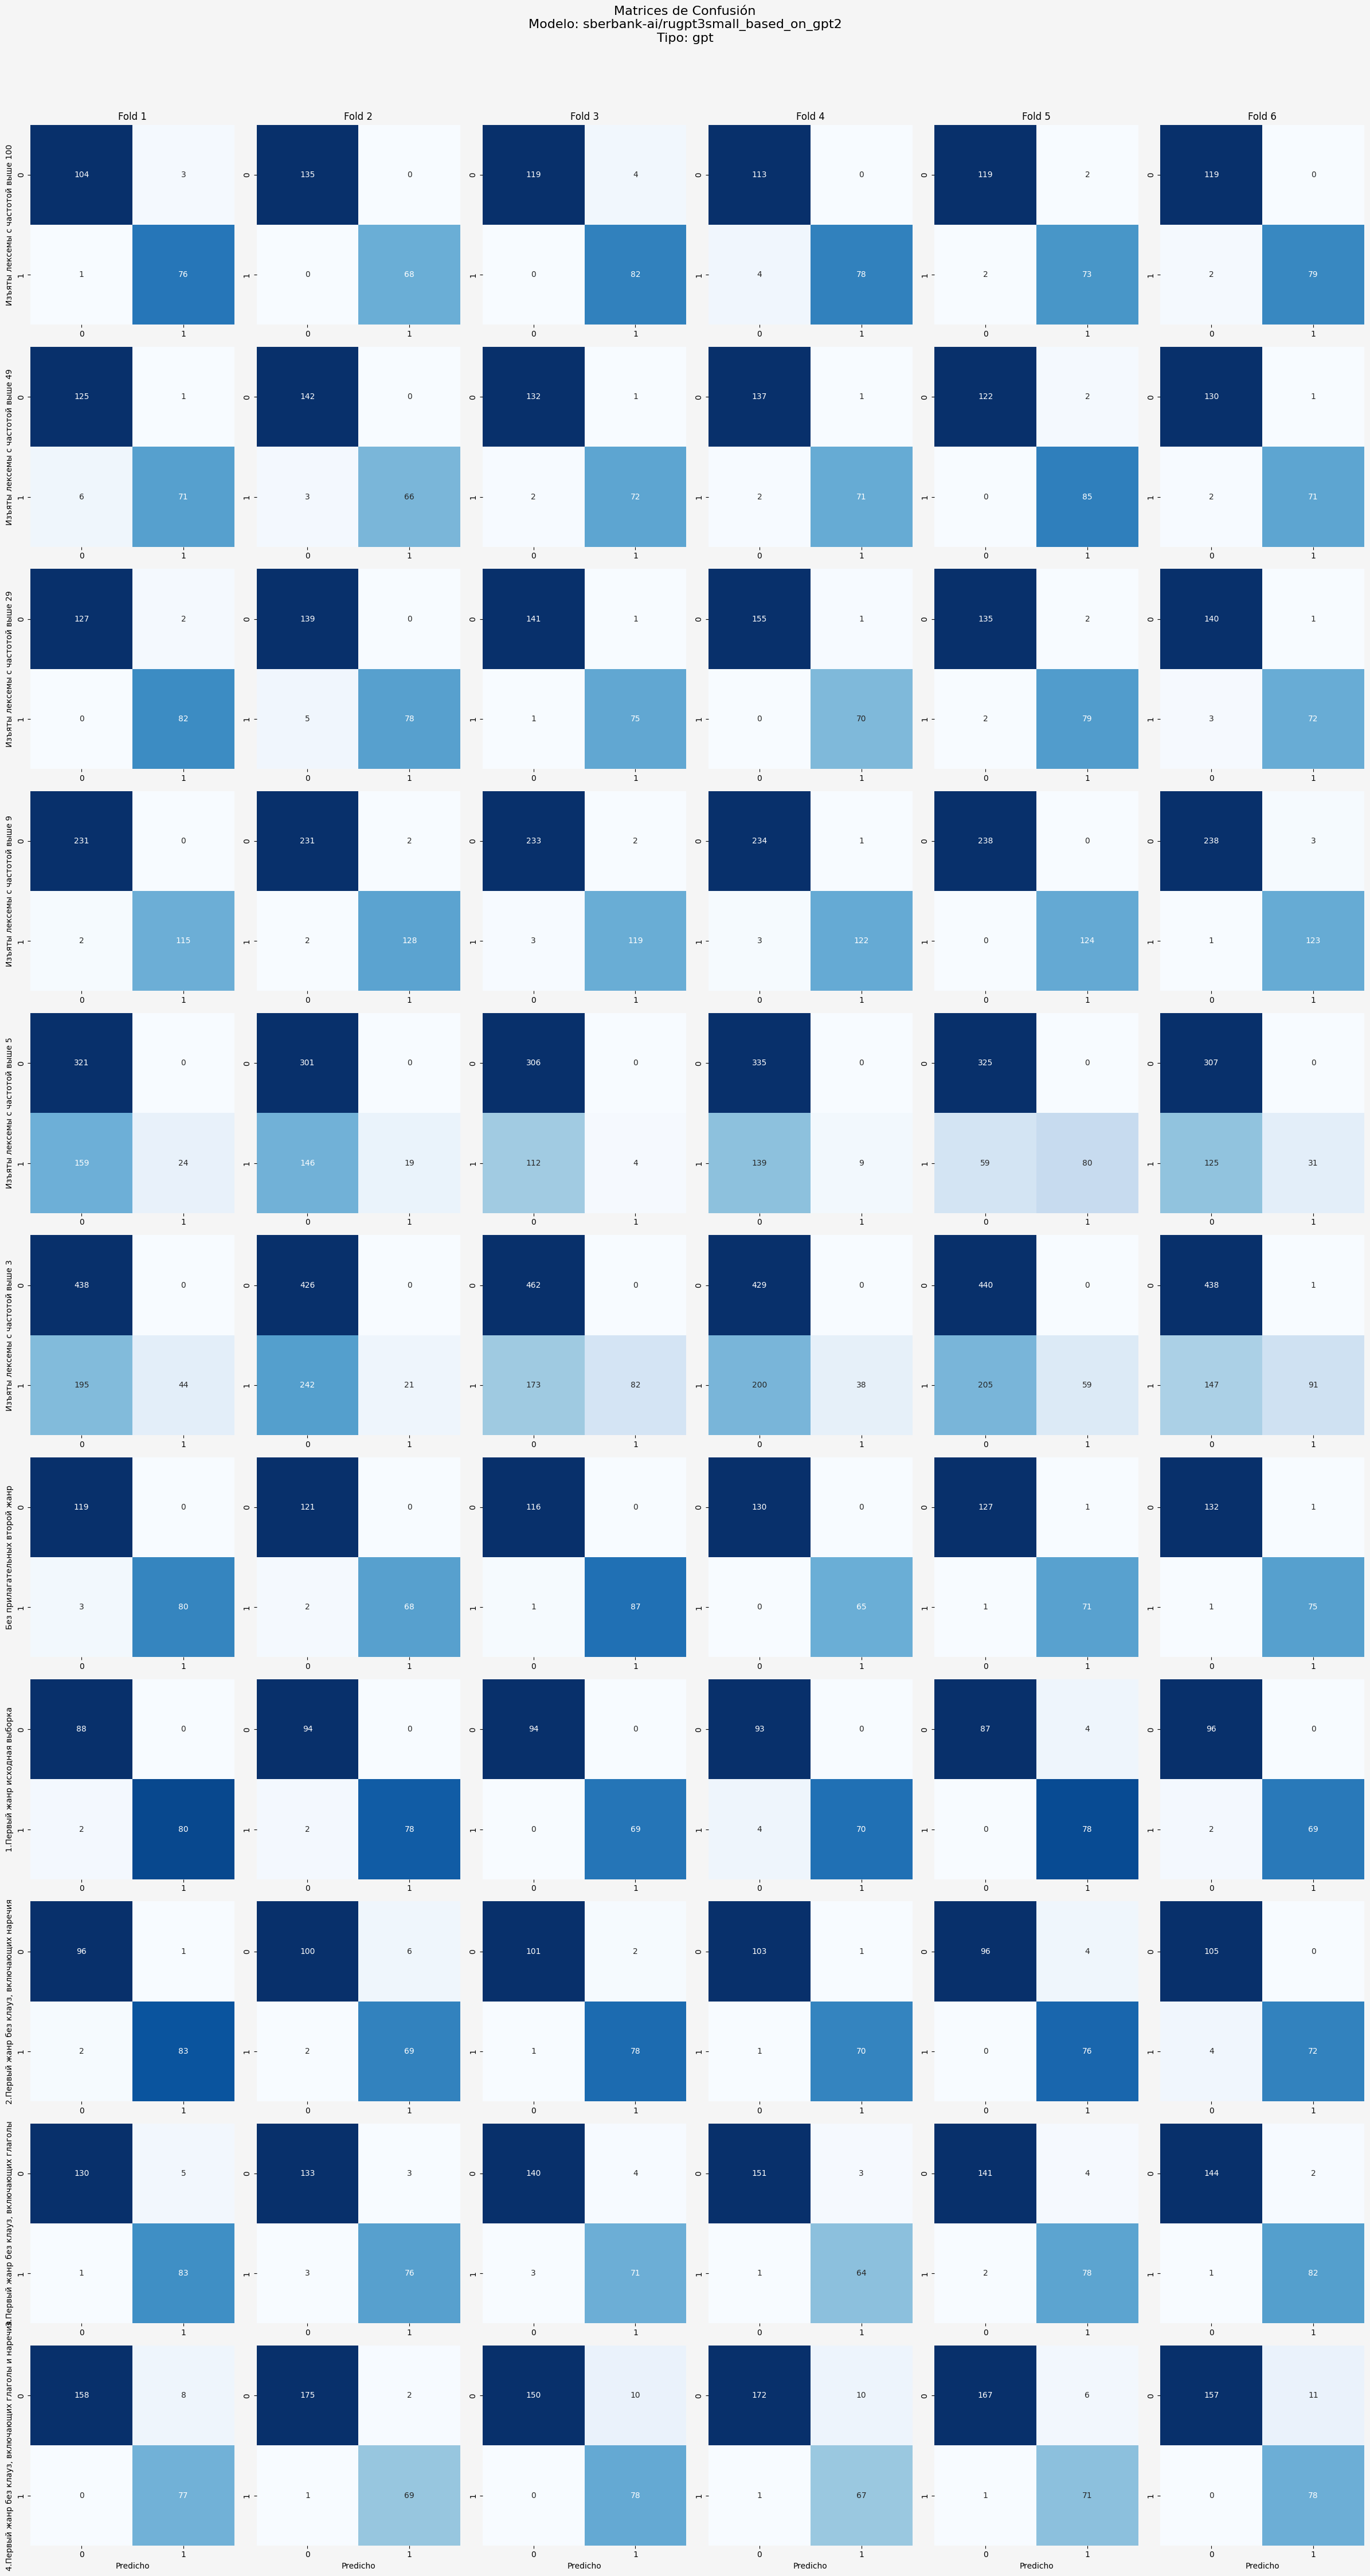

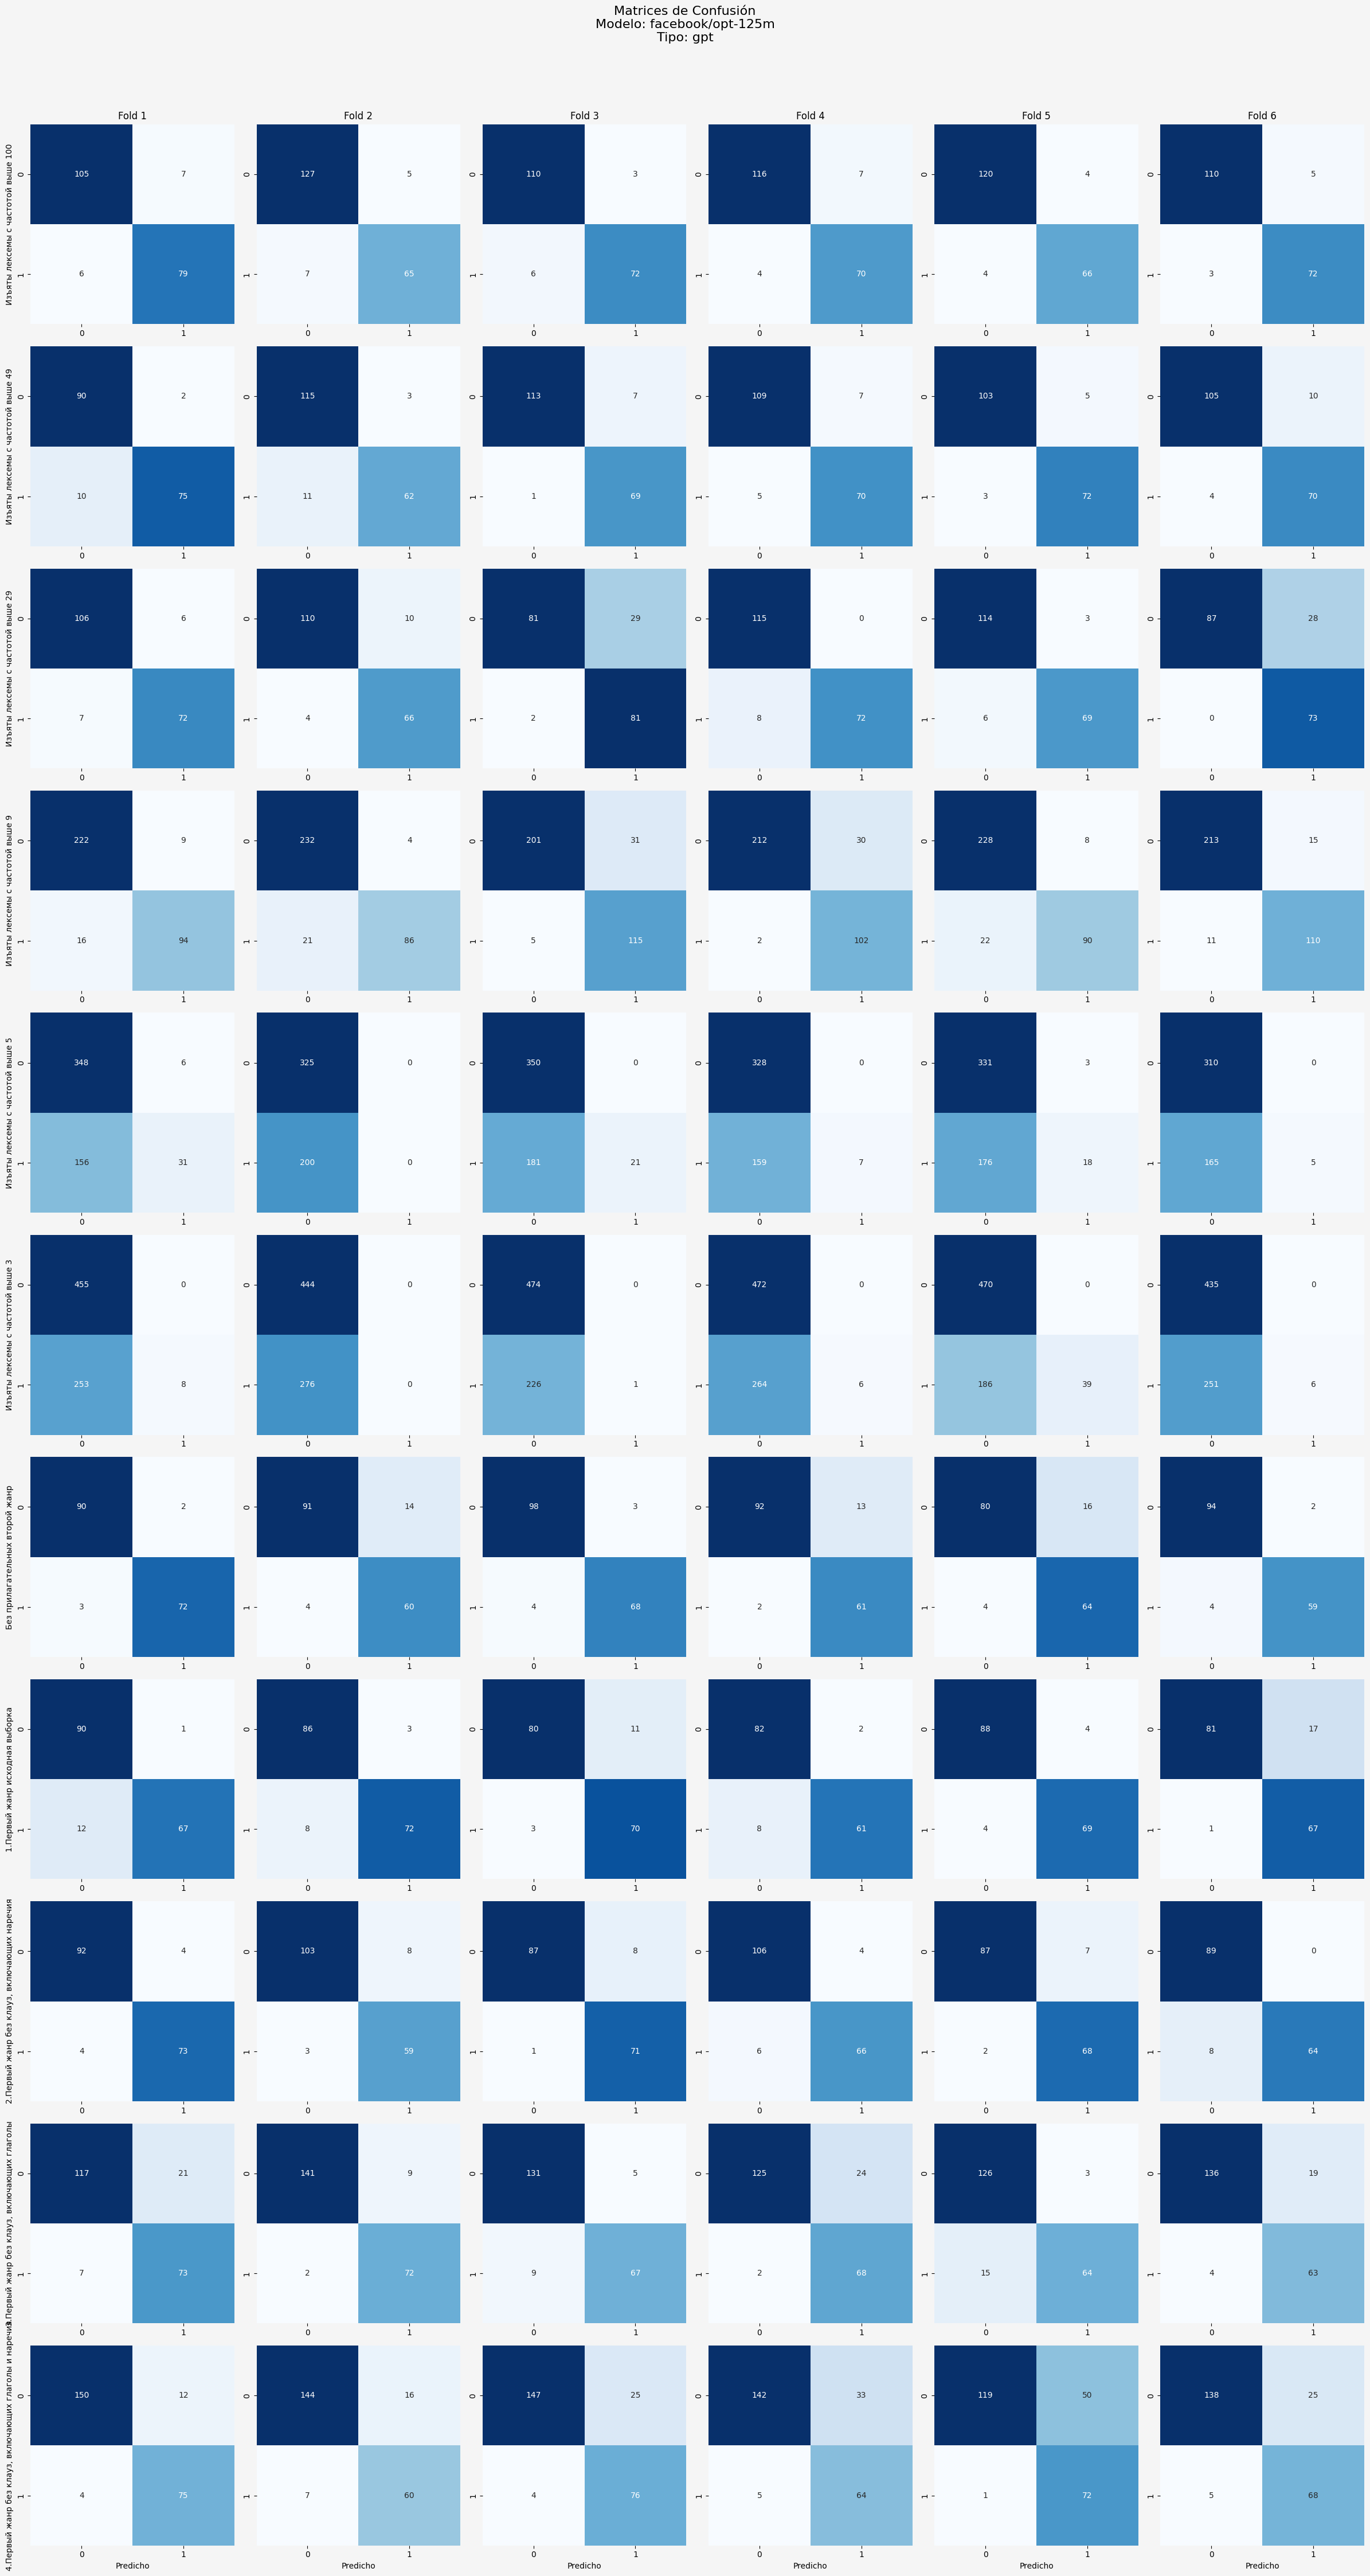


Procesamiento de todos los modelos completado.


In [9]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import logging
from unidecode import unidecode
from concurrent.futures import ProcessPoolExecutor

# Configurar logging
logging.basicConfig(filename='plot_confusion_matrices.log', level=logging.ERROR,
                    format='%(asctime)s - %(message)s', encoding='utf-8')

# Definir paleta de colores pastel
PASTEL_COLORS = [
    '#AEC6CF',  # Azul pastel
    '#FFB6C1',  # Rosa pastel
    '#98FF98',  # Verde pastel
    '#FFDAB9',  # Melocotón pastel
    '#E6E6FA',  # Lavanda pastel
    '#F0E68C',  # Amarillo pastel
    '#ADD8E6',  # Celeste pastel
    '#FFE4E1',  # Rosa suave pastel
    '#90EE90',  # Verde claro pastel
    '#FFFACD',  # Limón pastel
]

def _plot_single_model_confusion_matrices(model, df, output_dir, model_colors, show_plots):
    """Función auxiliar para procesar y graficar las matrices de confusión de un solo modelo."""
    print(f"\nProcesando modelo: {model}")

    # Filtrar resultados para este modelo
    model_results = df[df['model_name'] == model]
    num_datasets = len(model_results)

    # Determinar el número máximo de folds (matrices) para este modelo
    max_folds = max(len(res['confusion_matrices']) for res in model_results.to_dict('records'))

    # Configurar figura
    fig, axes = plt.subplots(nrows=num_datasets,
                             ncols=max_folds,
                             figsize=(4 * max_folds, 4 * num_datasets))

    # Ajustar título general
    model_type = model_results.iloc[0]['type']
    fig.suptitle(f"Matrices de Confusión\nModelo: {model}\nTipo: {model_type}",
                 fontsize=16, y=1.02)

    # Obtener color pastel para el modelo
    pastel_color = model_colors[model]

    # Ajustar axes para un solo dataset
    if num_datasets == 1:
        axes = np.array([axes])

    # Iterar sobre cada dataset para este modelo
    for row_idx, (_, row) in enumerate(model_results.iterrows()):
        dataset_name = row['dataset_name']
        dataset_type = row['type']
        conf_matrices = row['confusion_matrices']
        num_folds = len(conf_matrices)

        # Graficar cada fold para este dataset
        for col_idx in range(max_folds):
            ax = axes[row_idx, col_idx] if num_datasets > 1 else axes[0, col_idx]

            if col_idx < num_folds:
                # Establecer color de fondo del subgráfico
                ax.set_facecolor(pastel_color)

                # Graficar matriz de confusión
                sns.heatmap(np.array(conf_matrices[col_idx]),
                            annot=True,
                            fmt="d",
                            cmap="Blues",
                            cbar=False,
                            ax=ax)

                # Configurar título solo en la primera fila
                if row_idx == 0:
                    ax.set_title(f"Fold {col_idx + 1}")

                # Configurar etiquetas en el eje Y (izquierda) para cada fila con dataset_name y type
                if col_idx == 0:
                    label = f"{dataset_name[:]}" if len(dataset_name) > 20 else f"{dataset_name} ({dataset_type})"
                    ax.set_ylabel(label)

                # Etiquetas de ejes X (abajo) solo en la última fila
                ax.set_xlabel("Predicho" if row_idx == num_datasets - 1 else "")
                # Ya no necesitamos la etiqueta "Real" en cada columna, la etiqueta del dataset en el eje Y es suficiente contexto.
                # ax.set_ylabel("Real" if col_idx == 0 else "")
            else:
                # Ocultar ejes si no hay datos
                ax.axis('off')

    # Establecer color de fondo de la figura (neutro)
    fig.patch.set_facecolor('#F5F5F5')  # Gris claro
    plt.tight_layout()

    # Guardar imagen
    safe_model_name = unidecode(model.replace('/', '_').replace(' ', '_')[:50])
    output_path = os.path.join(output_dir, f"confusion_matrices_{safe_model_name}.png")
    plt.savefig(output_path, bbox_inches='tight', dpi=150)
    print(f"Guardado en: {output_path}")

    # Mostrar figura si show_plots es True
    if show_plots:
        plt.show()

    plt.close(fig)  # Cerrar figura para liberar memoria

def plot_confusion_matrices_by_model_parallel(json_file='resultados_completos_models_datasets.json',
                                             output_dir='confusion_matrices_by_model_parallel',
                                             show_plots=False,
                                             num_workers=4):
    """
    Genera imágenes por modelo paralelizando el procesamiento de cada modelo.

    Args:
        json_file: Ruta al archivo JSON con los resultados
        output_dir: Directorio de salida para las imágenes
        show_plots: Si se muestran los gráficos interactivamente
        num_workers: Número de procesos a utilizar para la paralelización
    """
    # Cargar resultados desde el JSON
    try:
        with open(json_file, 'r', encoding='utf-8') as f:
            results = json.load(f)
    except Exception as e:
        print(f"Error cargando el archivo JSON {json_file}: {str(e)}")
        logging.error(f"Error cargando el archivo JSON {json_file}: {str(e)}")
        return

    # Convertir a DataFrame
    df = pd.DataFrame(results)

    # Verificar columnas necesarias
    required_columns = ['model_name', 'dataset_name', 'confusion_matrices', 'type']
    if not all(col in df.columns for col in required_columns):
        missing_cols = [col for col in required_columns if col not in df.columns]
        print(f"Error: El DataFrame no contiene las columnas necesarias: {missing_cols}")
        print(f"Columnas disponibles: {list(df.columns)}")
        logging.error(f"Columnas faltantes: {missing_cols}. Columnas disponibles: {list(df.columns)}")
        return

    # Obtener modelos únicos y asignar colores pastel
    unique_models = df['model_name'].unique()
    model_colors = {model: PASTEL_COLORS[i % len(PASTEL_COLORS)] for i, model in enumerate(unique_models)}
    print("Asignación de colores por modelo:")
    for model, color in model_colors.items():
        print(f"  {model}: {color}")

    print(f"Modelos encontrados: {len(unique_models)}")

    # Crear directorio de salida
    os.makedirs(output_dir, exist_ok=True)

    # Paralelizar el procesamiento de los modelos
    with ProcessPoolExecutor(max_workers=num_workers) as executor:
        futures = [executor.submit(_plot_single_model_confusion_matrices, model, df, output_dir, model_colors, show_plots) for model in unique_models]
        for future in futures:
            future.result()  # Esperar a que cada tarea termine (y capturar cualquier excepción)

    print("\nProcesamiento de todos los modelos completado.")

# Ejemplo de uso con paralelización (usando 4 procesos)
plot_confusion_matrices_by_model_parallel(show_plots=True, num_workers=4)

Encontrados 7 modelos únicos.

Procesando modelo: DeepPavlov/rubert-base-cased
Guardado en: large_average_confusion_matrices_by_model/large_average_confusion_matrices_DeepPavlov_rubert-base-cased.png


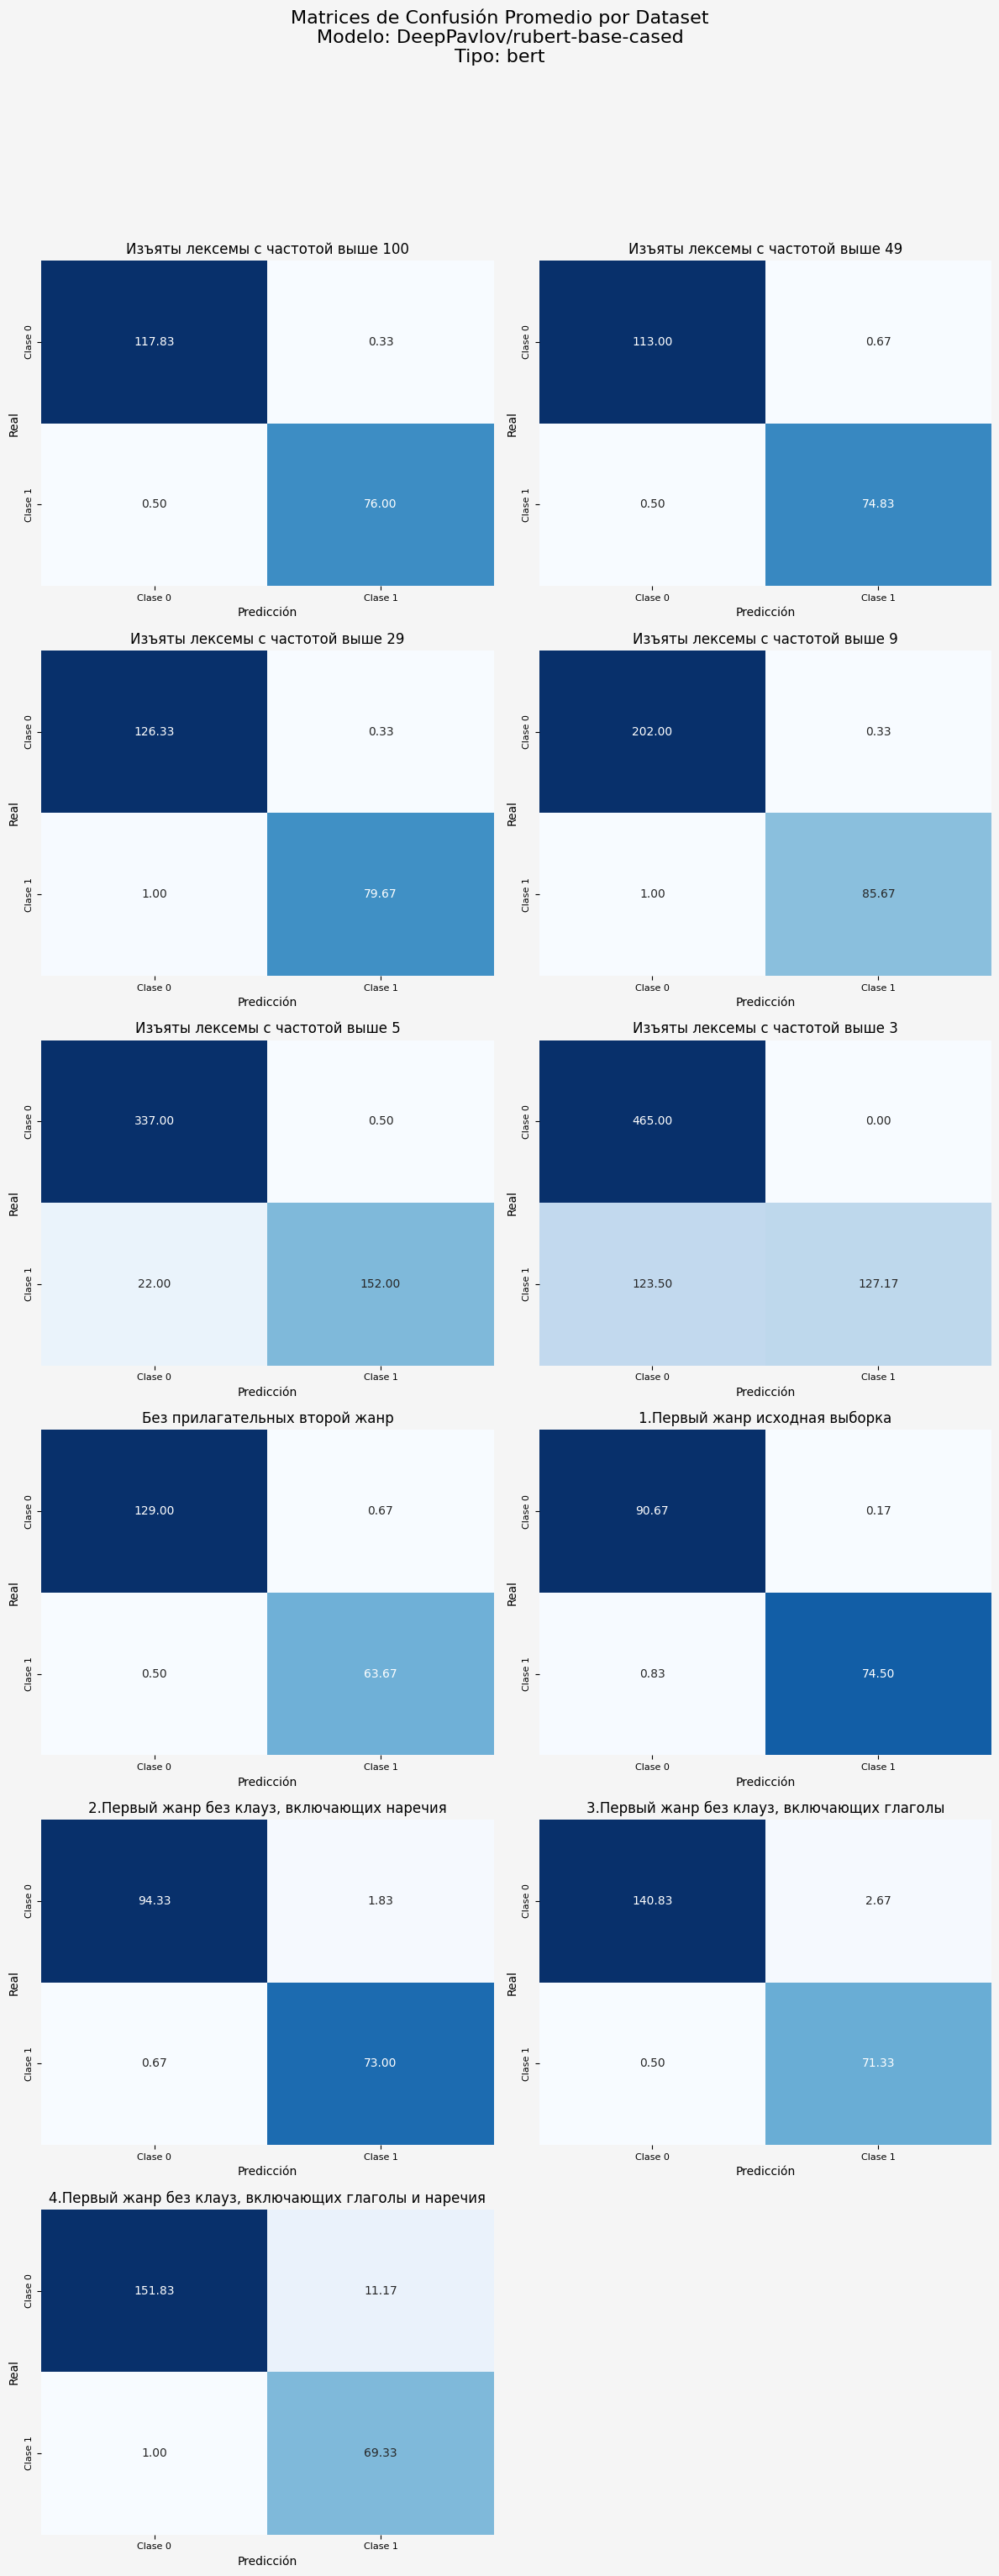


Procesando modelo: bert-base-multilingual-cased
Guardado en: large_average_confusion_matrices_by_model/large_average_confusion_matrices_bert-base-multilingual-cased.png


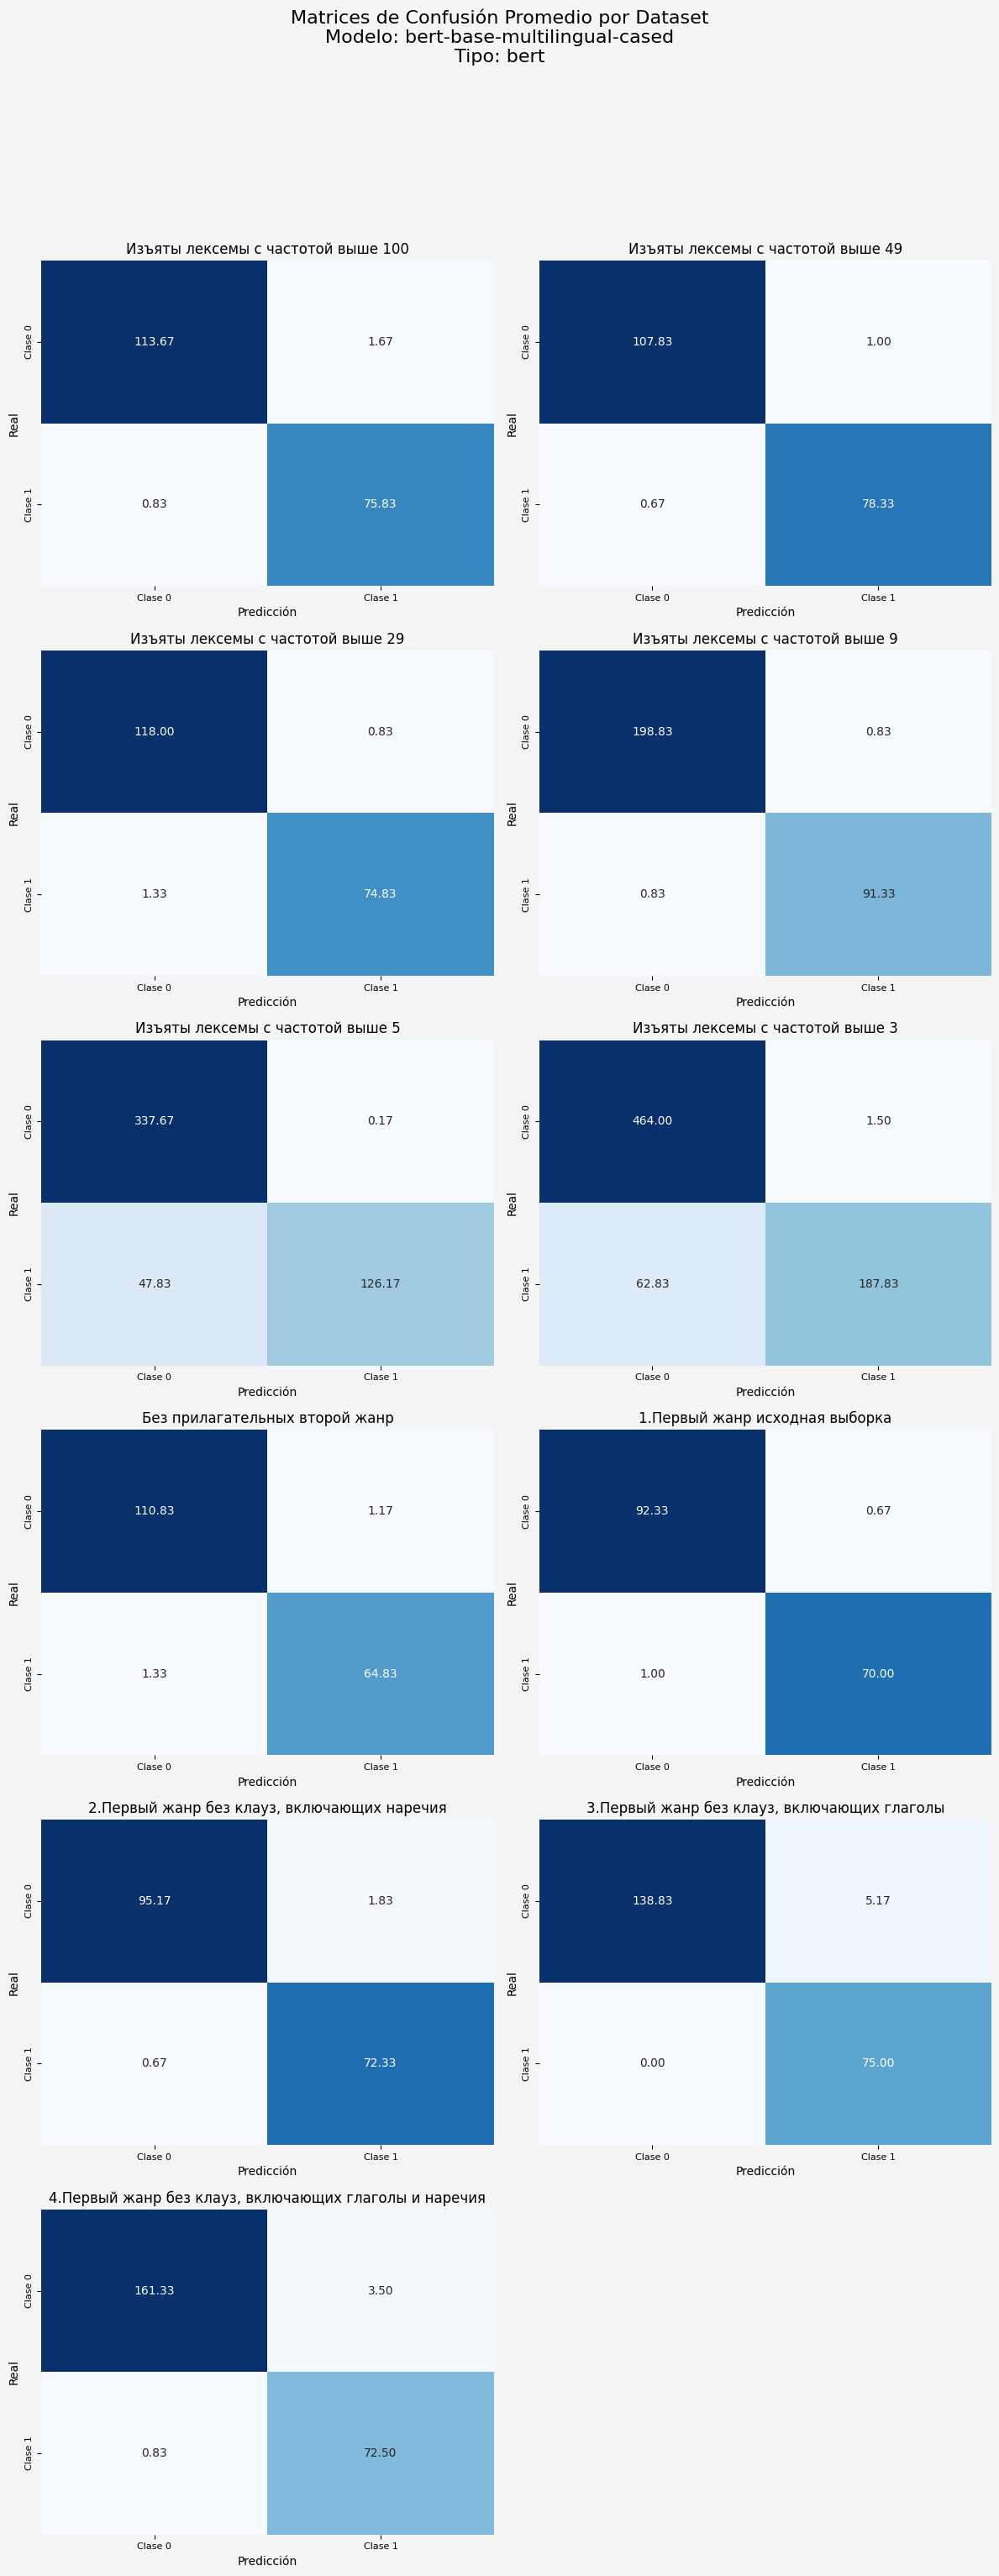


Procesando modelo: distilbert-base-multilingual-cased
Guardado en: large_average_confusion_matrices_by_model/large_average_confusion_matrices_distilbert-base-multilingual-cased.png


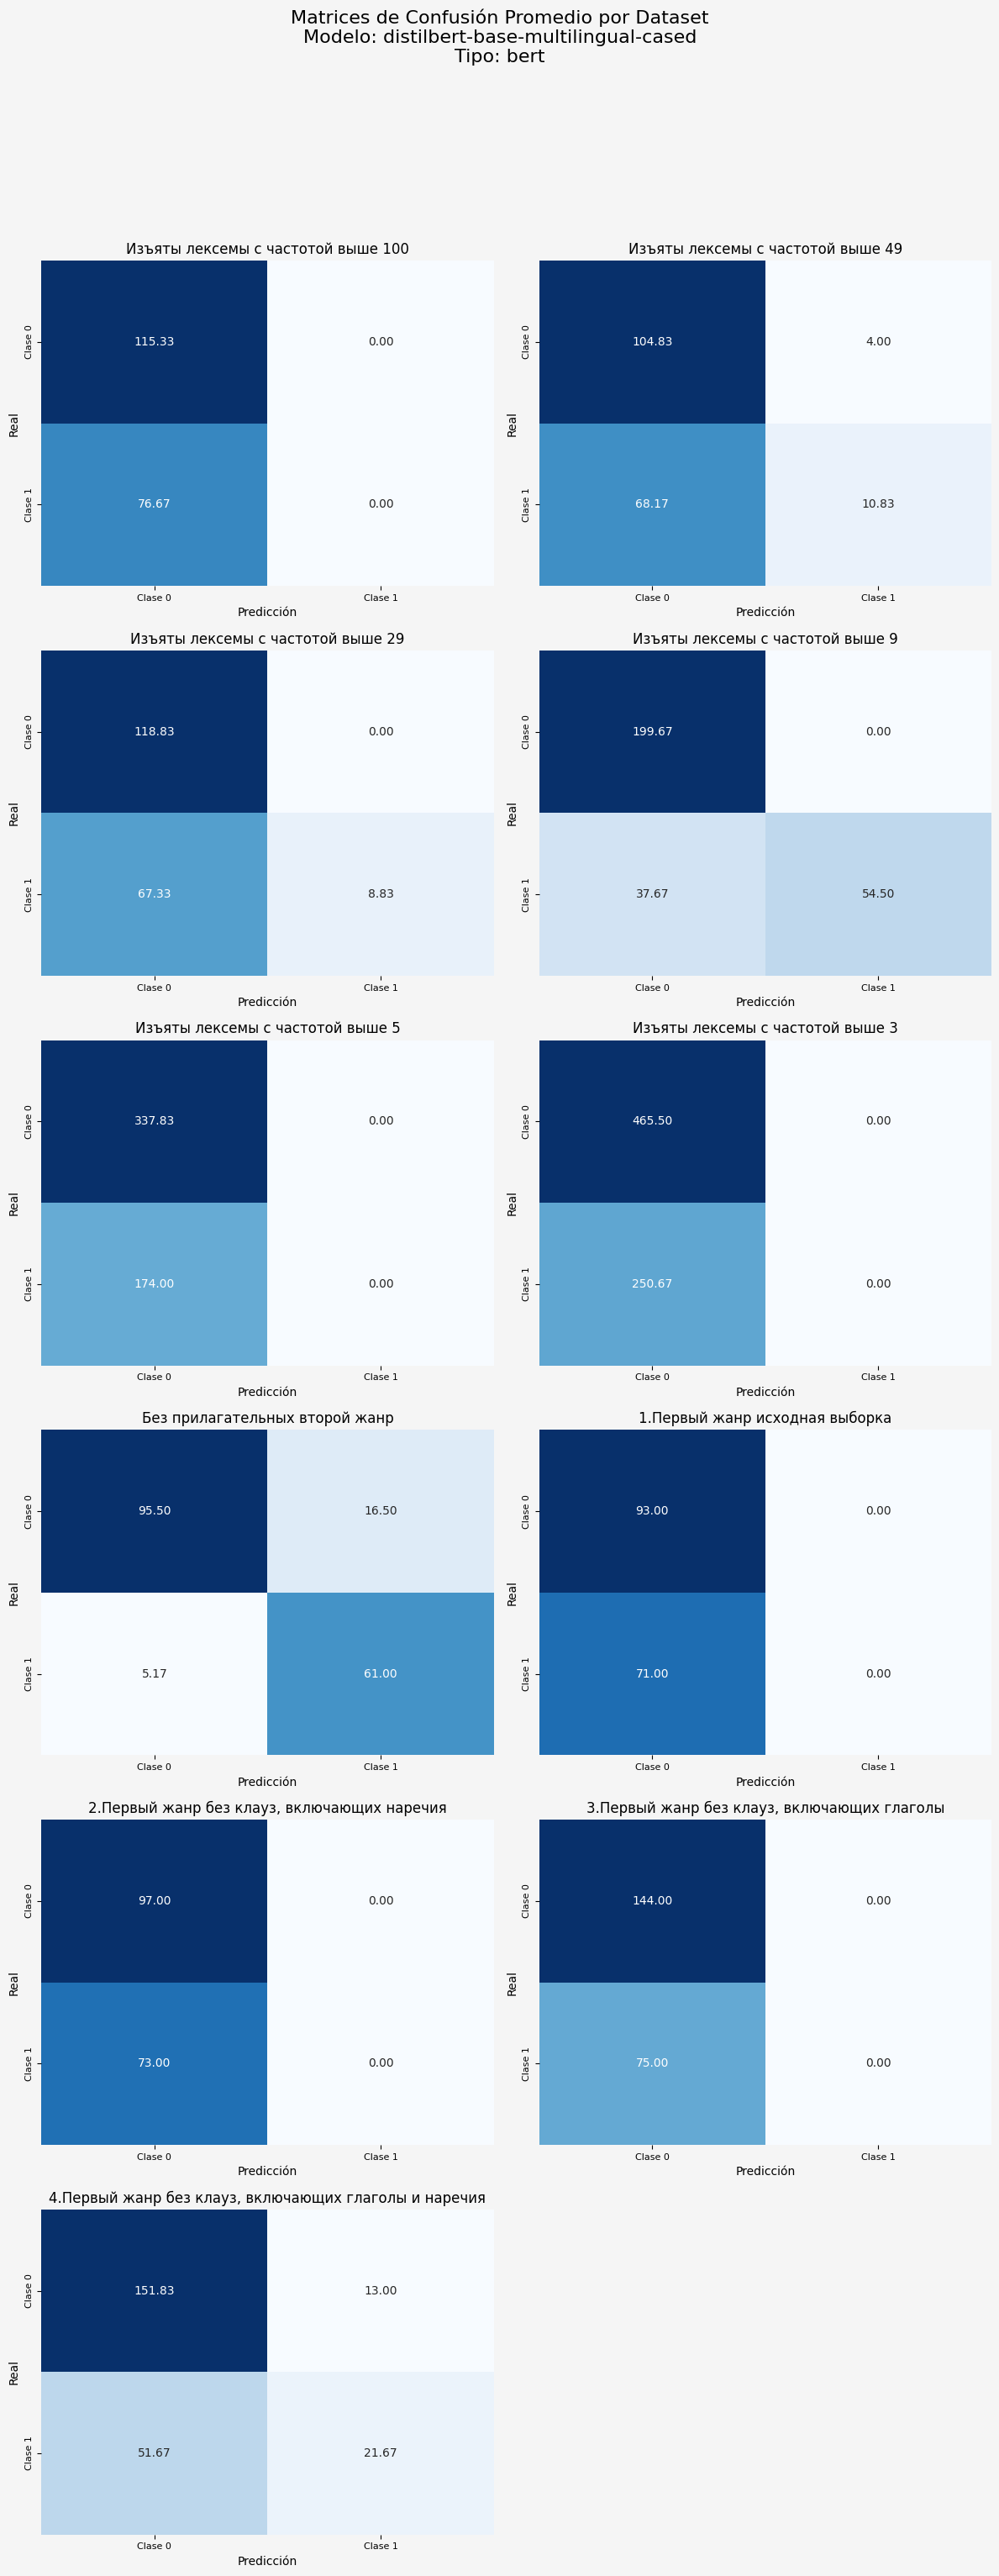


Procesando modelo: roberta-base
Guardado en: large_average_confusion_matrices_by_model/large_average_confusion_matrices_roberta-base.png


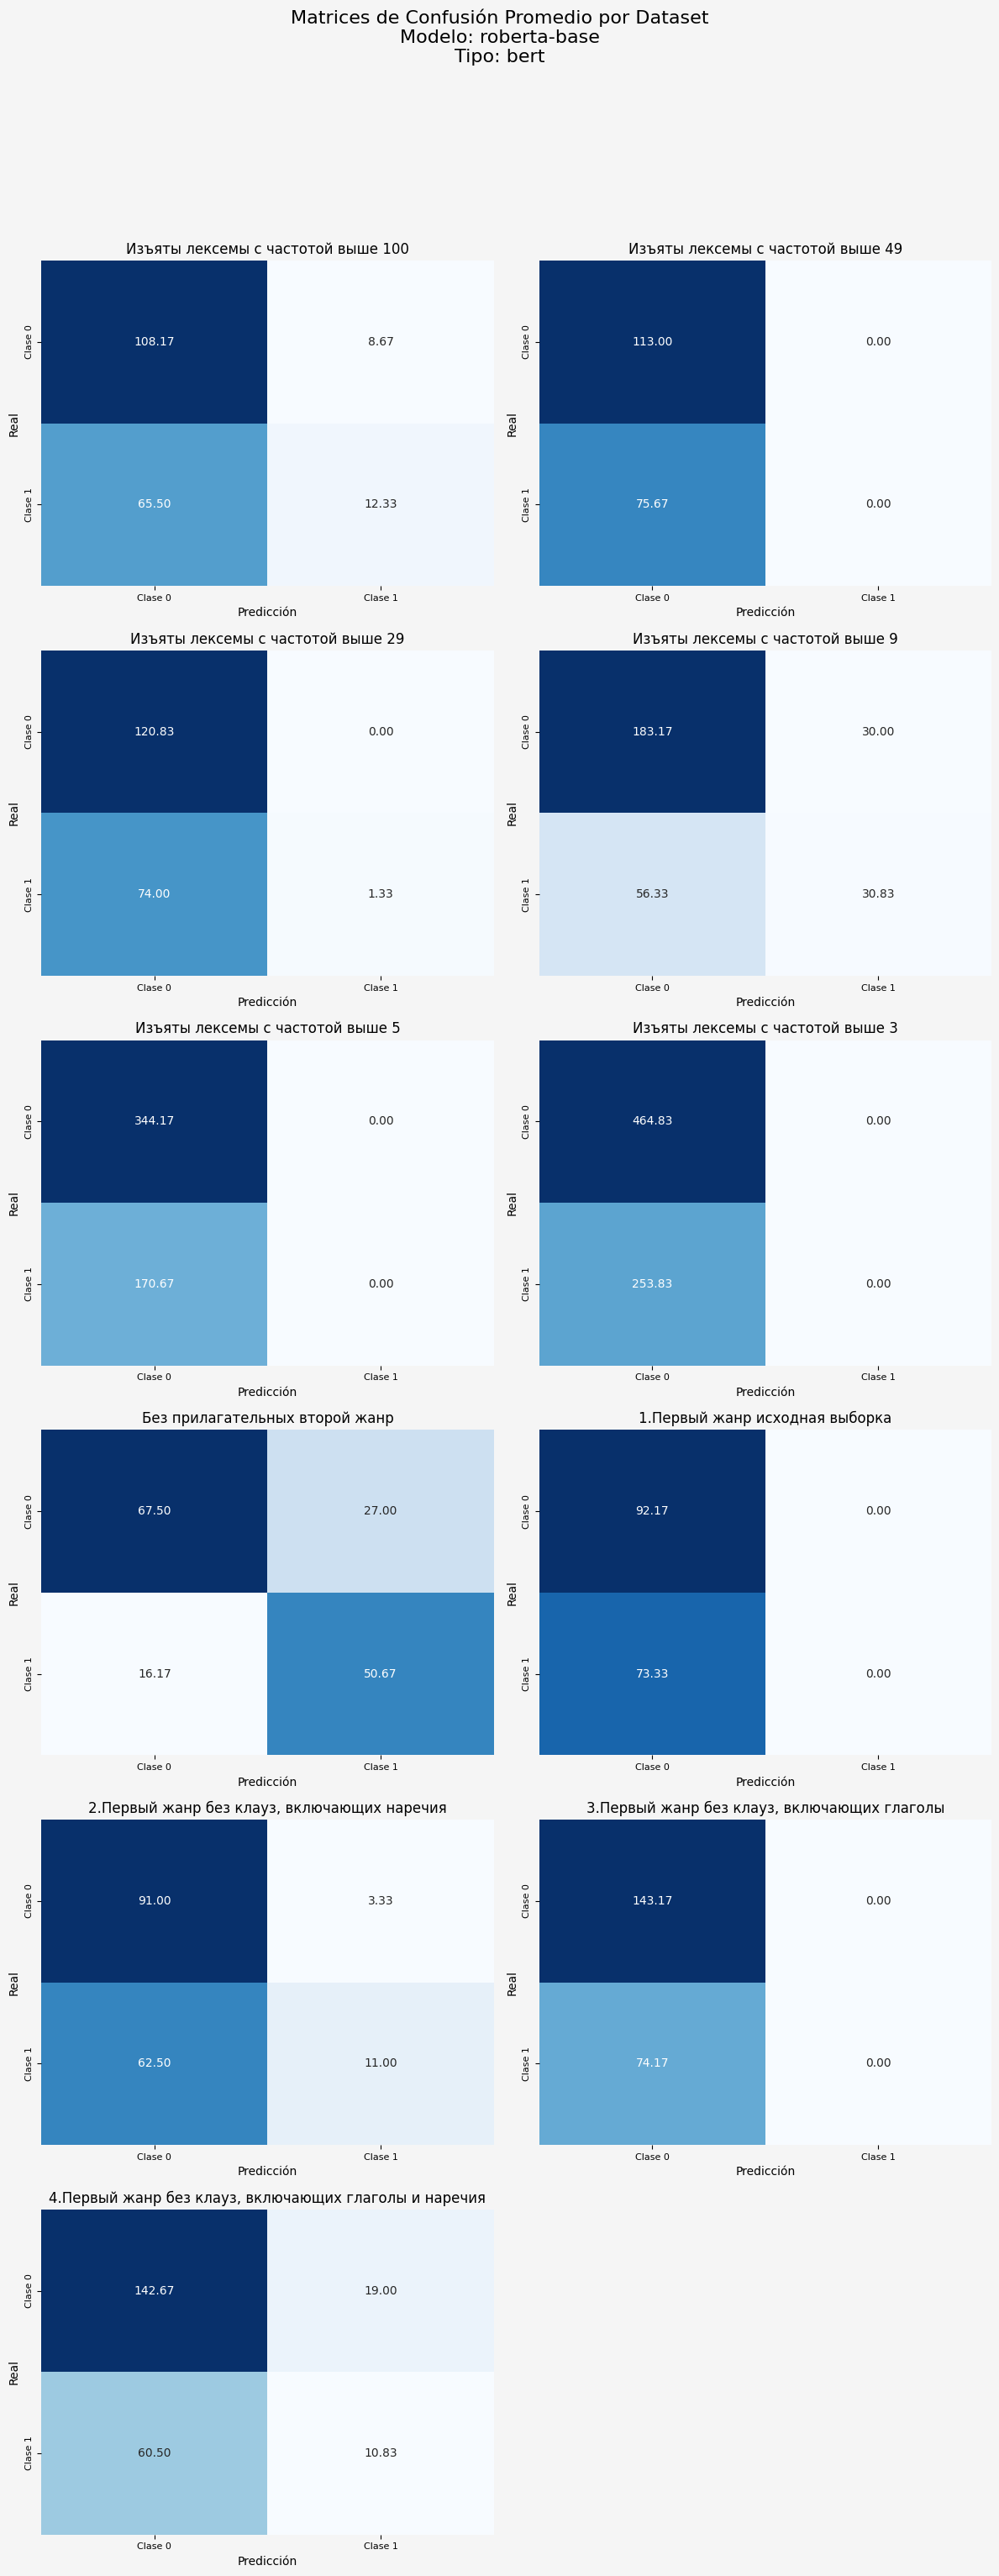


Procesando modelo: gpt2
Guardado en: large_average_confusion_matrices_by_model/large_average_confusion_matrices_gpt2.png


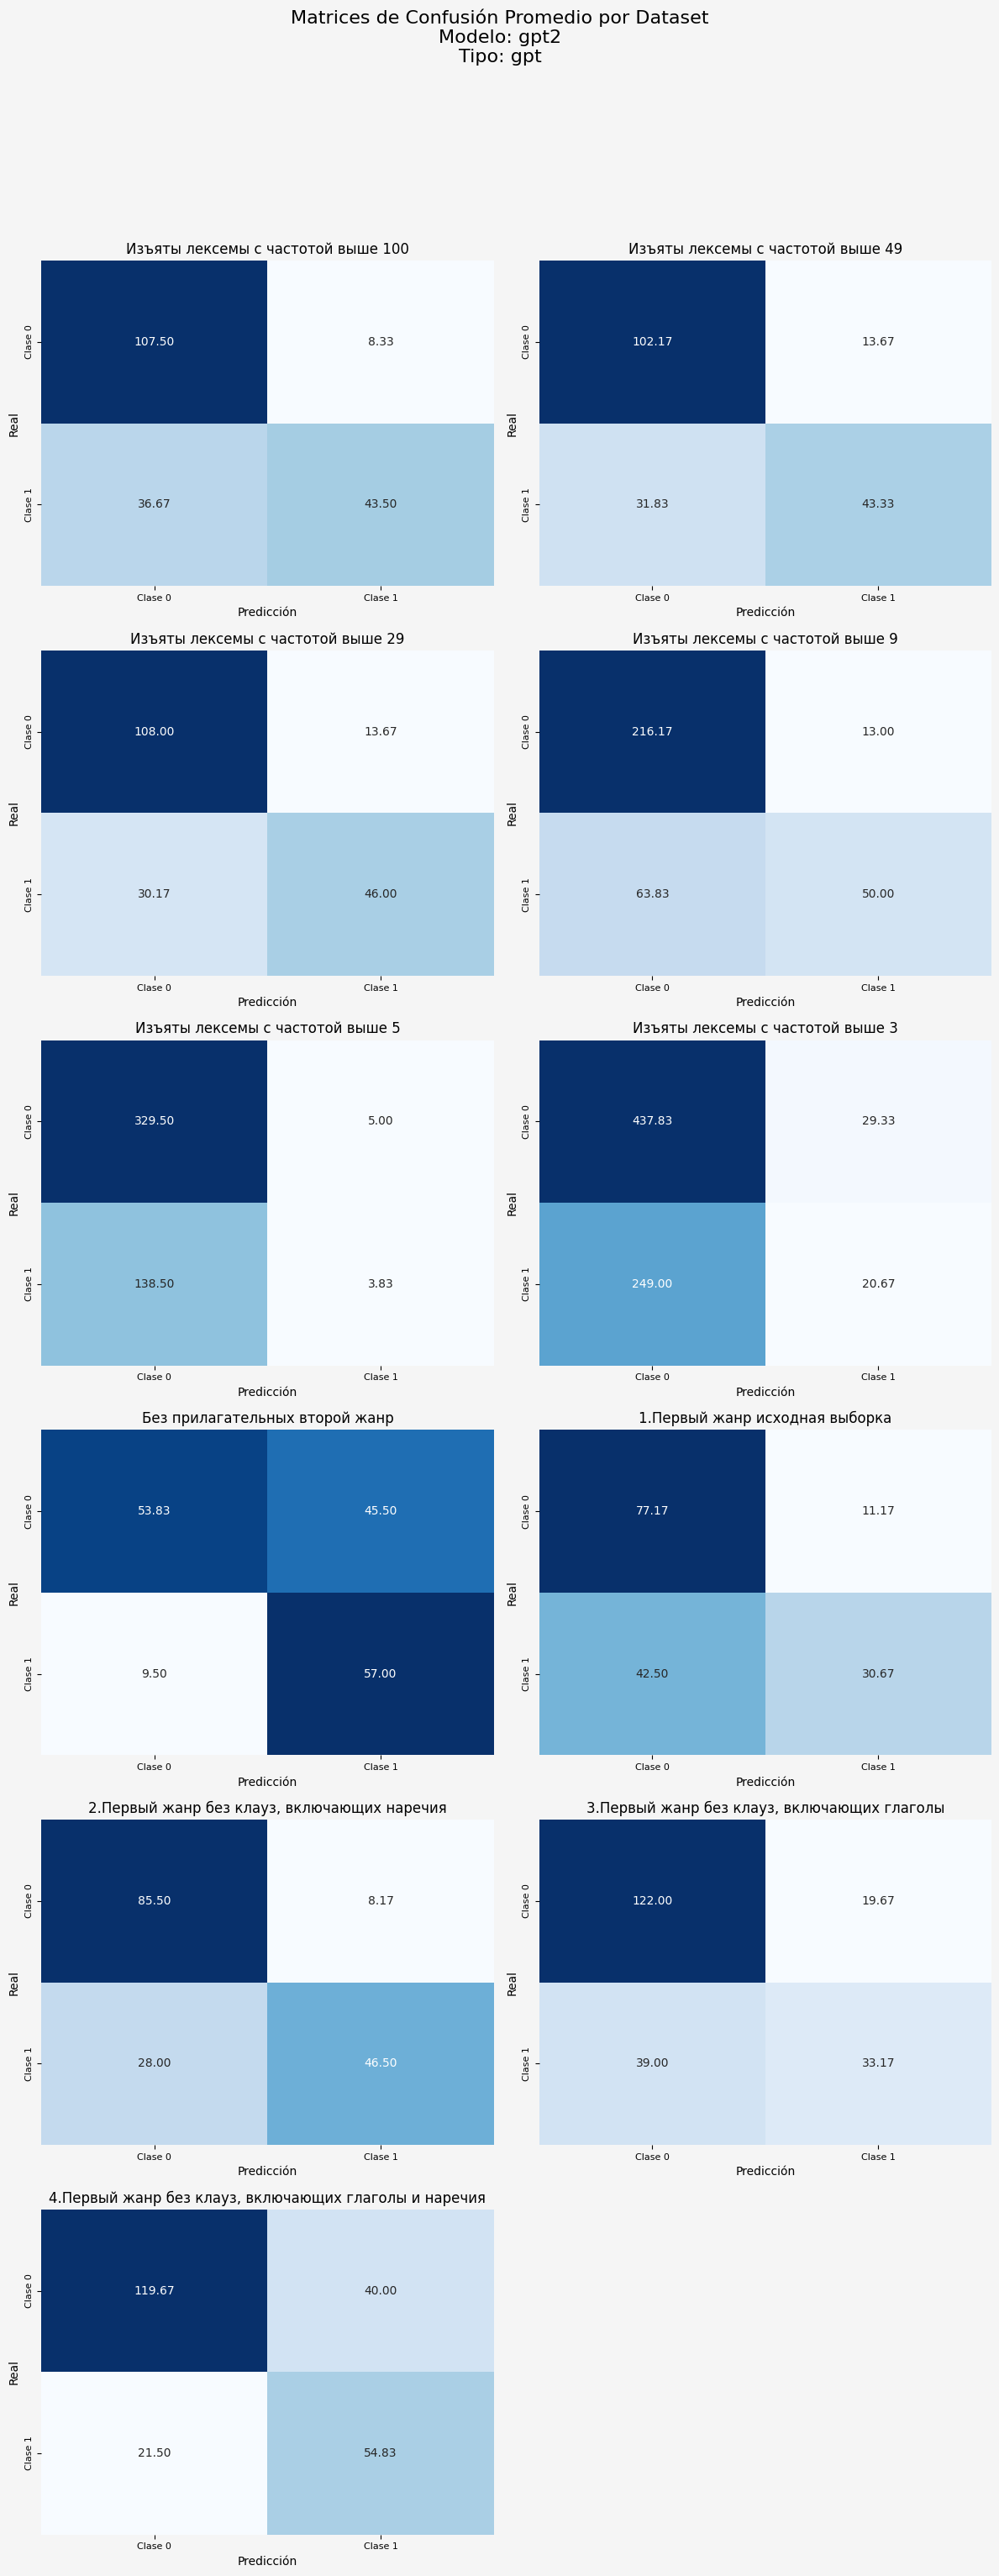


Procesando modelo: facebook/opt-125m
Guardado en: large_average_confusion_matrices_by_model/large_average_confusion_matrices_facebook_opt-125m.png


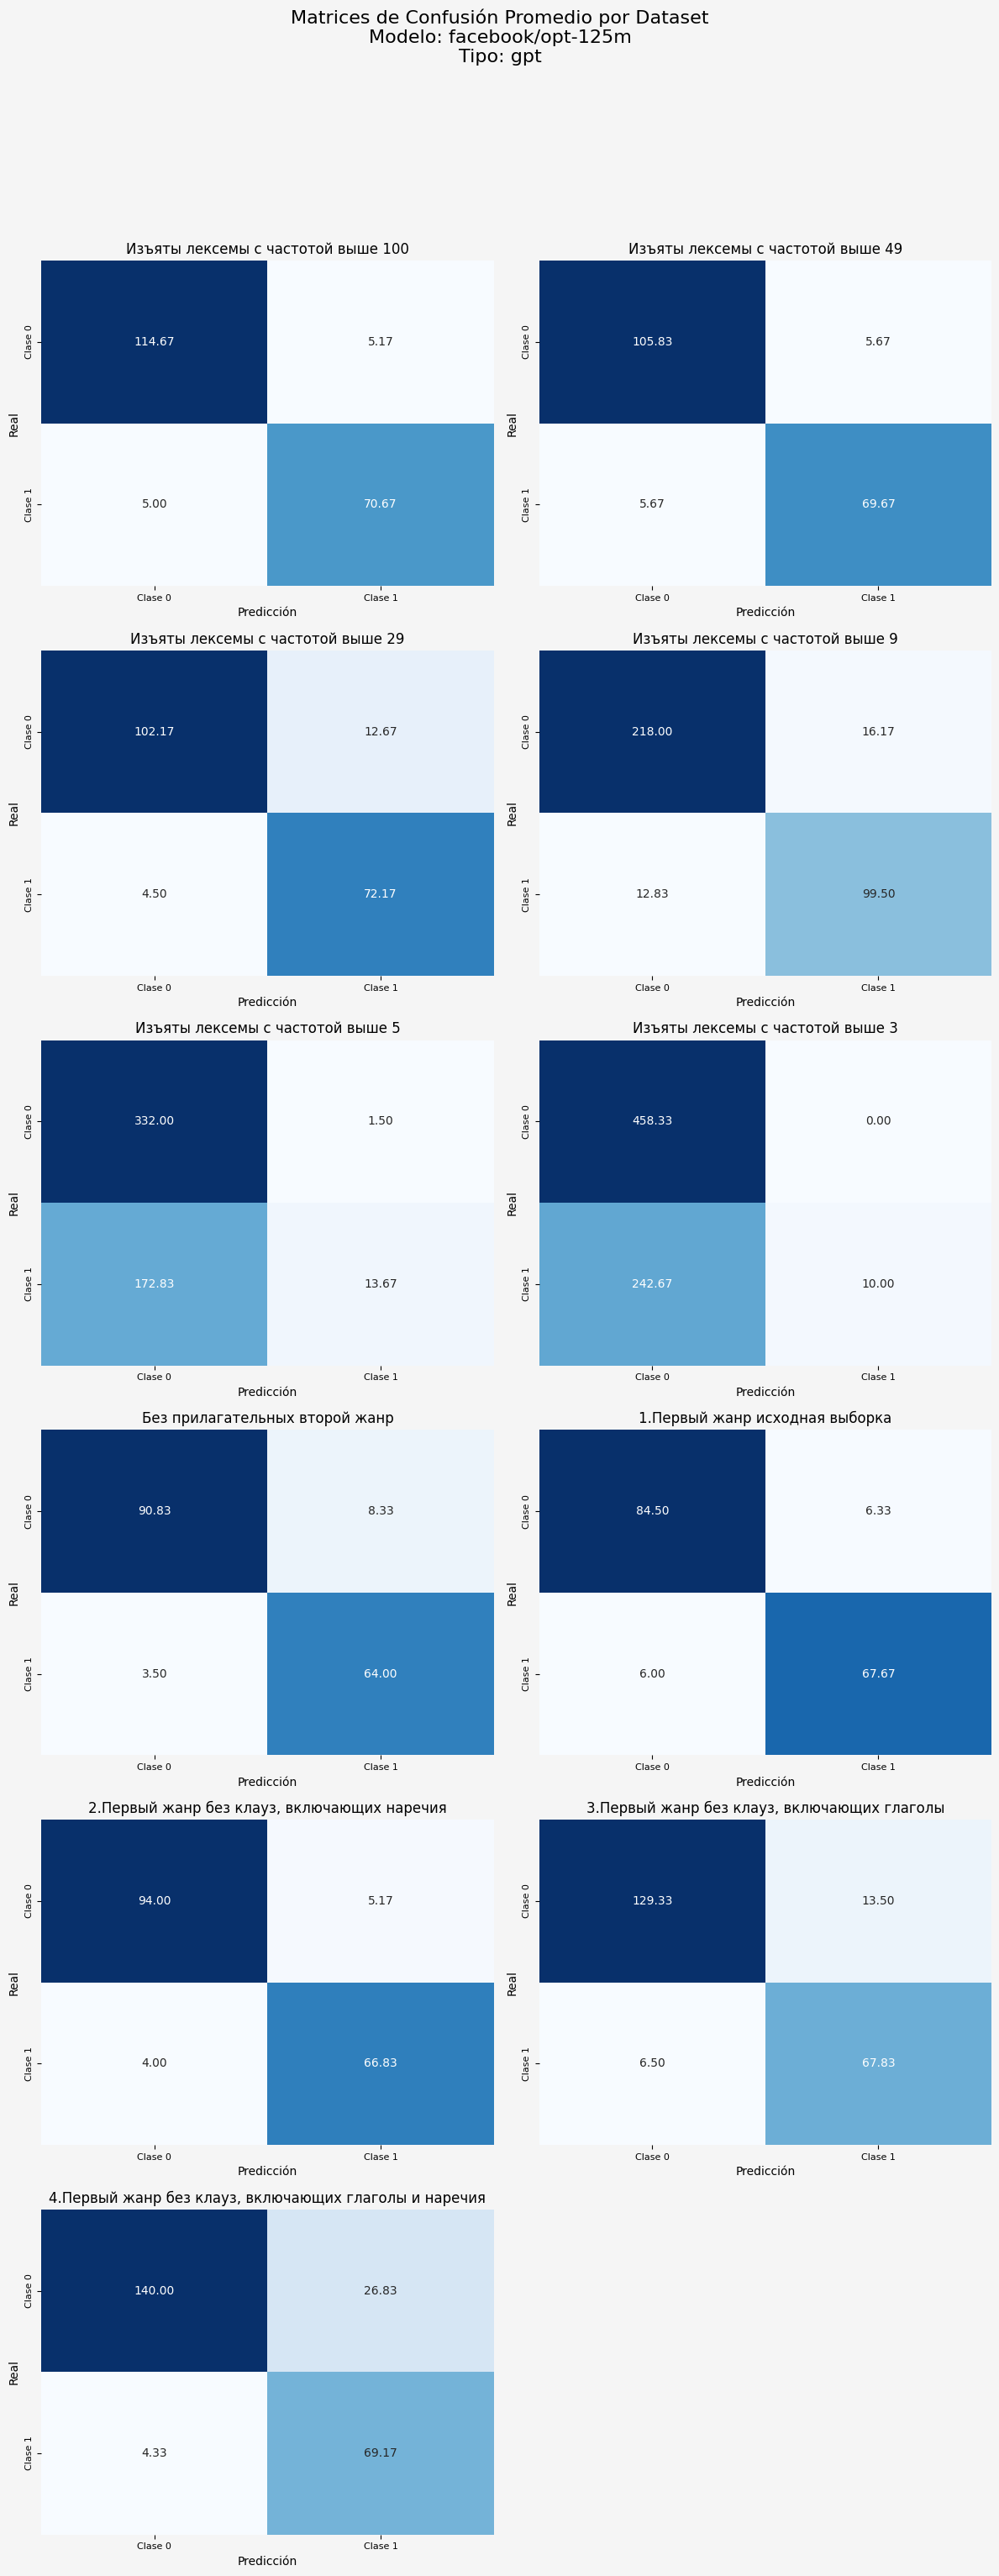


Procesando modelo: sberbank-ai/rugpt3small_based_on_gpt2
Guardado en: large_average_confusion_matrices_by_model/large_average_confusion_matrices_sberbank-ai_rugpt3small_based_on_gpt2.png


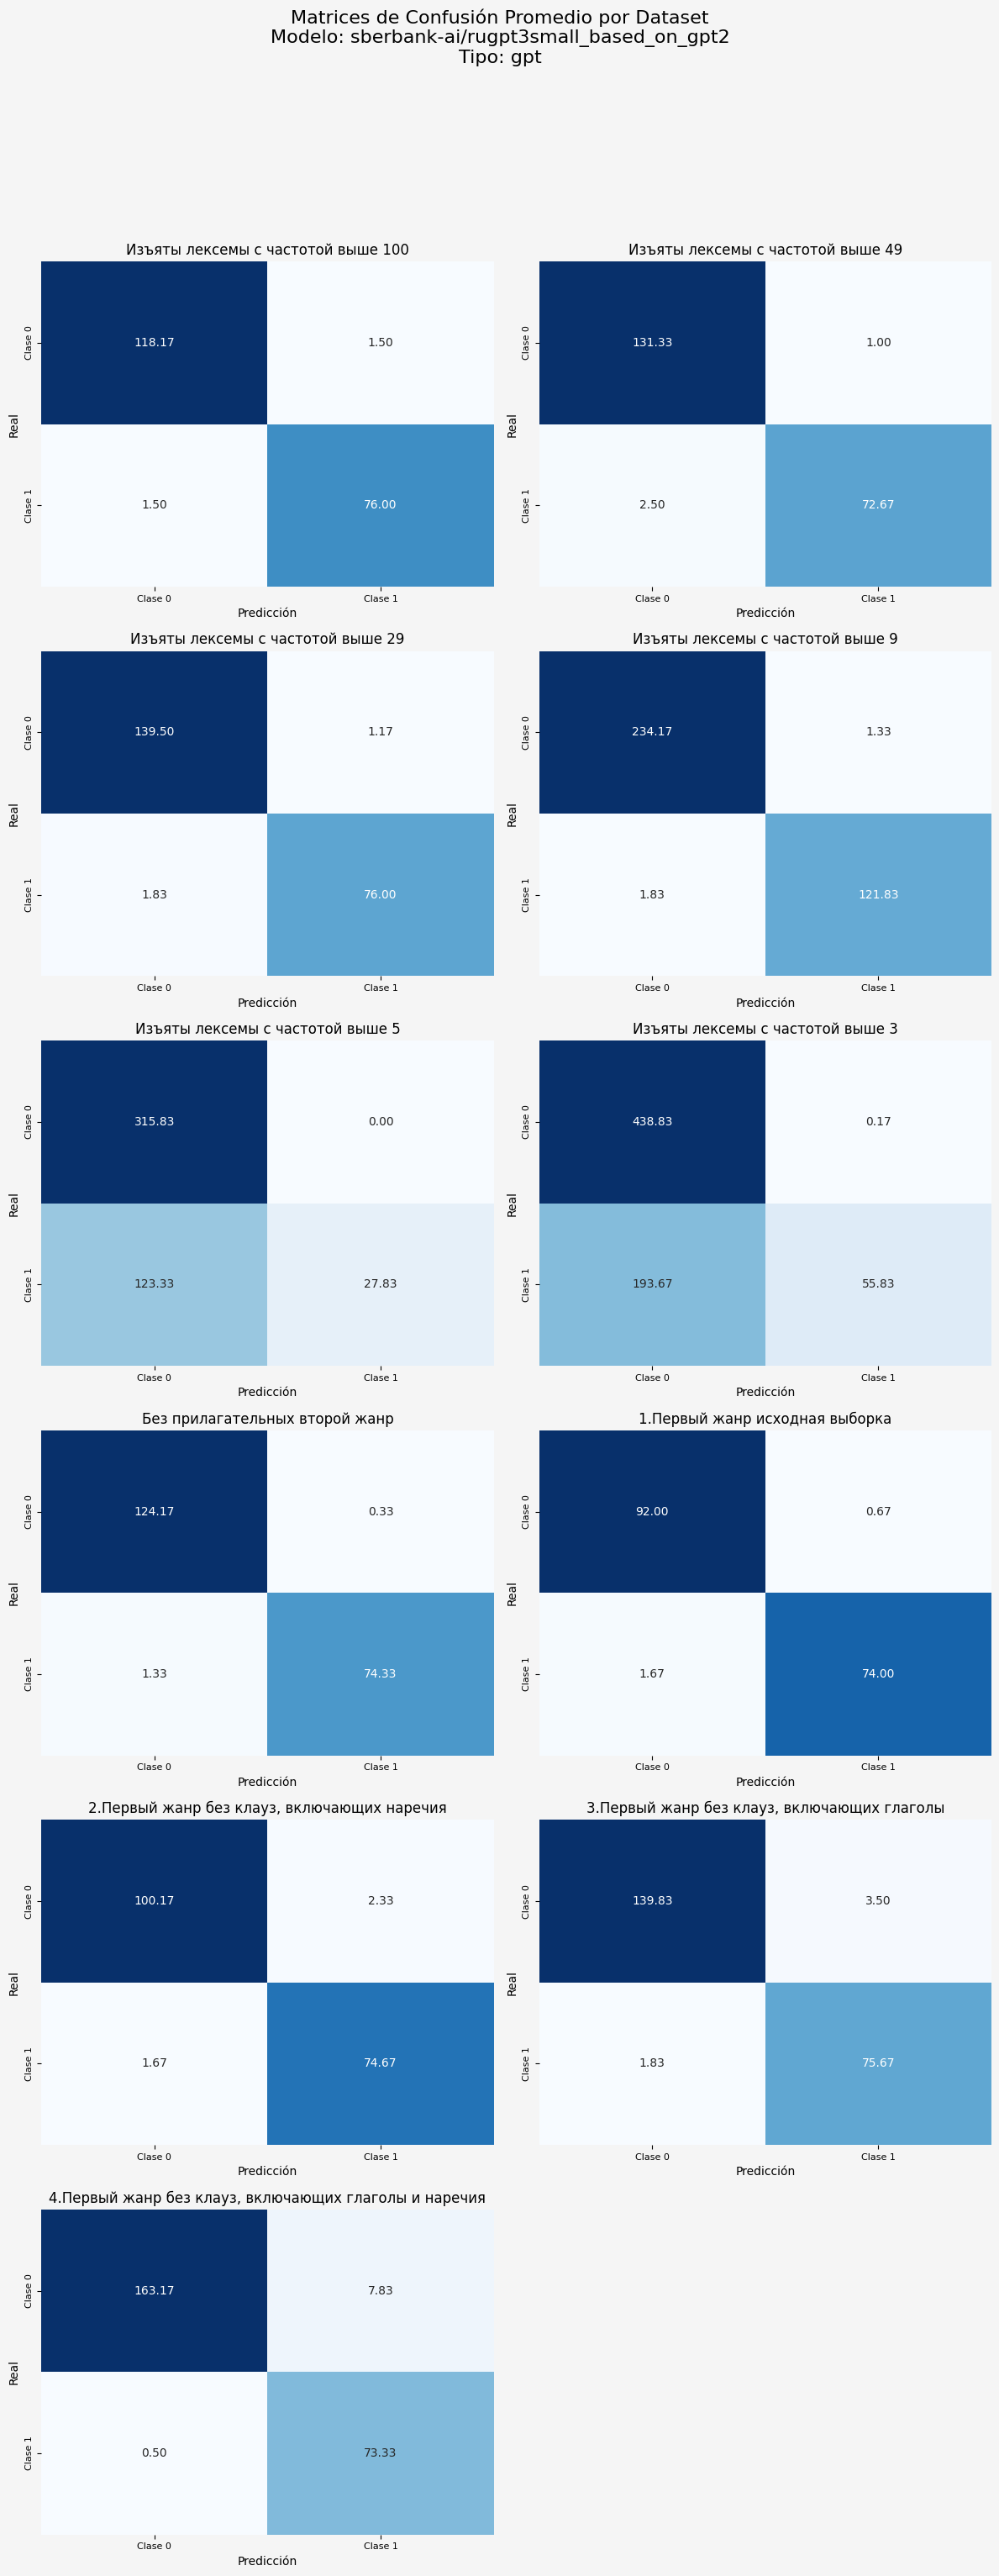


Procesamiento de todos los modelos completado.


In [10]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import logging
from unidecode import unidecode
import math

# Configurar logging
logging.basicConfig(filename='plot_large_avg_confusion_matrices_by_model.log', level=logging.ERROR,
                    format='%(asctime)s - %(message)s', encoding='utf-8')

# Definir paleta de colores pastel
PASTEL_COLORS = [
    '#AEC6CF',  # Azul pastel
    '#FFB6C1',  # Rosa pastel
    '#98FF98',  # Verde pastel
    '#FFDAB9',  # Melocotón pastel
    '#E6E6FA',  # Lavanda pastel
    '#F0E68C',  # Amarillo pastel
    '#ADD8E6',  # Celeste pastel
    '#FFE4E1',  # Rosa suave pastel
    '#90EE90',  # Verde claro pastel
    '#FFFACD',  # Limón pastel
]

def plot_large_average_confusion_matrices_by_model(json_file='resultados_completos_models_datasets.json',
                                                     output_dir='large_average_confusion_matrices_by_model',
                                                     max_cols=3,  # Número máximo de columnas por fila
                                                     subplot_size=(6, 5), # Tamaño de cada subplot
                                                     show_plots=False):
    """
    Genera una imagen por modelo, mostrando las matrices de confusión promedio para cada dataset
    distribuidas en múltiples filas si es necesario, con subgráficos más grandes.

    Args:
        json_file: Ruta al archivo JSON con los resultados.
        output_dir: Directorio de salida para las imágenes.
        max_cols: Número máximo de columnas de subgráficos por fila.
        subplot_size: Tupla (ancho, alto) para el tamaño de cada subgráfico.
        show_plots: Si se muestran los gráficos interactivamente.
    """
    # Cargar resultados desde el JSON
    try:
        with open(json_file, 'r', encoding='utf-8') as f:
            results = json.load(f)
    except Exception as e:
        print(f"Error cargando el archivo JSON {json_file}: {str(e)}")
        logging.error(f"Error cargando el archivo JSON {json_file}: {str(e)}")
        return

    # Convertir a DataFrame
    df = pd.DataFrame(results)

    # Verificar columnas necesarias
    required_columns = ['model_name', 'dataset_name', 'avg_confusion_matrix', 'type']
    if not all(col in df.columns for col in required_columns):
        missing_cols = [col for col in required_columns if col not in df.columns]
        print(f"Error: El DataFrame no contiene las columnas necesarias: {missing_cols}")
        print(f"Columnas disponibles: {list(df.columns)}")
        logging.error(f"Columnas faltantes: {missing_cols}. Columnas disponibles: {list(df.columns)}")
        return

    # Obtener modelos únicos
    unique_models = df['model_name'].unique()
    print(f"Encontrados {len(unique_models)} modelos únicos.")

    # Asignar colores pastel a los modelos
    model_colors = {model: PASTEL_COLORS[i % len(PASTEL_COLORS)] for i, model in enumerate(unique_models)}

    # Iterar sobre cada modelo único
    for model_name in unique_models:
        print(f"\nProcesando modelo: {model_name}")

        # Crear el directorio de salida para este modelo (redundante si ya existe, pero seguro)
        os.makedirs(output_dir, exist_ok=True)

        # Filtrar el DataFrame para el modelo actual
        model_df = df[df['model_name'] == model_name]
        unique_datasets = model_df['dataset_name'].unique()
        num_datasets = len(unique_datasets)

        if num_datasets == 0:
            print(f"Advertencia: No se encontraron datasets para el modelo {model_name}.")
            continue

        # Calcular el número de filas y columnas para los subgráficos
        num_rows = math.ceil(num_datasets / max_cols)
        num_cols = min(num_datasets, max_cols)

        # Configurar la figura para el modelo actual
        fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(subplot_size[0] * num_cols, subplot_size[1] * num_rows))
        fig.suptitle(f'Matrices de Confusión Promedio por Dataset\nModelo: {model_name}\nTipo: {model_df.iloc[0]["type"] if not model_df.empty else "N/A"}', fontsize=16, y=1.02)
        fig.patch.set_facecolor('#F5F5F5')  # Fondo gris claro para la figura

        # Aplanar la matriz de axes para facilitar la iteración
        if num_datasets > 1:
            axes = axes.flatten()
        else:
            axes = np.array([axes])

        # Iterar sobre cada dataset para el modelo actual y graficar
        for i, dataset_name in enumerate(unique_datasets):
            dataset_results = model_df[model_df['dataset_name'] == dataset_name].iloc[0]
            if 'avg_confusion_matrix' in dataset_results:
                avg_cm = np.array(dataset_results['avg_confusion_matrix'])
                ax = axes[i]
                sns.heatmap(avg_cm, annot=True, fmt=".2f", cmap="Blues", cbar=False,
                            xticklabels=["Clase 0", "Clase 1"],
                            yticklabels=["Clase 0", "Clase 1"],
                            ax=ax,
                            facecolor=model_colors.get(model_name, '#EEEEEE')) # Color de fondo del subplot

                ax.set_title(f'{dataset_name[:]}', fontsize=12)
                ax.set_xlabel('Predicción', fontsize=10)
                ax.set_ylabel('Real', fontsize=10)
                ax.tick_params(axis='both', which='major', labelsize=8)

            else:
                print(f"Advertencia: No se encontró 'avg_confusion_matrix' para el dataset {dataset_name} del modelo {model_name}.")
                logging.warning(f"No se encontró 'avg_confusion_matrix' para el dataset {dataset_name} del modelo {model_name}.")
                if num_datasets > 1:
                    fig.delaxes(axes[i])
                else:
                    fig.delaxes(axes)

        # Ocultar los subgráficos vacíos si hay menos datasets que el número total de subgráficos
        for j in range(num_datasets, num_rows * num_cols):
            if num_datasets > 1:
                fig.delaxes(axes[j])
            elif num_datasets == 1 and num_rows * num_cols > 1:
                pass # No es necesario eliminar si solo hay un subplot

        plt.tight_layout(rect=[0, 0, 1, 0.96]) # Ajustar layout para evitar superposición del título
        safe_model_name = unidecode(model_name.replace('/', '_').replace(' ', '_')[:50])
        output_path = os.path.join(output_dir, f"large_average_confusion_matrices_{safe_model_name}.png")
        plt.savefig(output_path, dpi=150, bbox_inches='tight')
        print(f"Guardado en: {output_path}")

        if show_plots:
            plt.show()

        plt.close(fig)

    print("\nProcesamiento de todos los modelos completado.")

# Ejemplo de uso:
plot_large_average_confusion_matrices_by_model(show_plots=True, max_cols=2) # Ejemplo con máximo 2 columnas